# Practical Problem 2

### Kyle Goyette ID: 20085129
### Giancarlo Kerg ID: 20109271
### Alexandre Dos Santos ID: 20114844

In [ ]:
!kill -9 -1

In [1]:
!pip install --no-cache-dir -I pillow

    100% |████████████████████████████████| 5.9MB 30.4MB/s 


In [0]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torch.nn.functional as F
from torch.autograd import Variable

import matplotlib.pyplot as plt
import skimage

import time
from google.colab import files

In [0]:
!rm -rf ./dogs_vs_cats

In [4]:
"""
Created on Mon Jan 15 13:31:59 2018
@author: shawntan
"""

import urllib
import pickle
import os
import warnings
warnings.filterwarnings("ignore")

if not os.path.exists('./dogs_vs_cats/'):
  os.makedirs('./dogs_vs_cats/')
  
train_dir = 'train_64x64'
validation_dir = 'valid_64x64'
test_dir = 'test_64x64'

urlpath = 'https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip'
filename  = 'train.zip'
filepath = os.path.join('./dogs_vs_cats/', filename)
print("Downloading...")
urllib.request.urlretrieve(urlpath, filepath)

Downloading...


('./dogs_vs_cats/train.zip', <http.client.HTTPMessage at 0x7f5858360cc0>)

In [5]:
import numpy as np
import zipfile
import scipy.ndimage
import glob
import shutil
import gzip
import pickle
import os

filename  = 'train.zip'
filepath = os.path.join('./dogs_vs_cats/', filename)

print("Extracting file...")
zip_ref = zipfile.ZipFile(filepath, 'r')
zip_ref.extractall('./dogs_vs_cats/')
zip_ref.close()

train_file_list = glob.glob(os.path.join(
    './dogs_vs_cats/',
    'PetImages',
    '*', '*.jpg'))
train_proc_data = os.path.join('./dogs_vs_cats/', train_dir)
valid_proc_data = os.path.join('./dogs_vs_cats/', validation_dir)
test_proc_data = os.path.join('./dogs_vs_cats/', test_dir)
if not os.path.exists(train_proc_data):
    os.makedirs(train_proc_data)
if not os.path.exists(valid_proc_data):
    os.makedirs(valid_proc_data)
if not os.path.exists(test_proc_data):
    os.makedirs(test_proc_data)
print('done')

Extracting file...
done


In [6]:
import glob
import os
import scipy.ndimage
import shutil
warnings.filterwarnings("ignore")

final_size = 64

print("Some files may not open. This is fine.")
for in_pic_path in train_file_list:
    filename = \
        '.'.join(os.path.normpath(in_pic_path).split(os.path.sep)[-2:])
    out_pic_path = os.path.join(train_proc_data, filename)
    try:
        img = scipy.ndimage.imread(in_pic_path)
        side_dim = min(img.shape[0], img.shape[1])
        start_height = (img.shape[0] - side_dim) // 2
        start_width = (img.shape[1] - side_dim) // 2
        img = img[start_height: start_height + side_dim,
                  start_width: start_width + side_dim]

        img = scipy.misc.imresize(
            img,
            size=(final_size, final_size),
            interp='bilinear'
        )

        if len(img.shape) == 3 and img.shape[2] > 3:
            img = img[:, :, 3]

        assert(img.shape[0] == final_size and
               img.shape[1] == final_size)
        scipy.misc.imsave(out_pic_path, img)
    except IOError:
        print("Could not open", out_pic_path)
for pic_path in glob.glob(os.path.join('./dogs_vs_cats/', train_dir,
                                          '*.1????.jpg')):
    split_path = os.path.normpath(pic_path).split(os.path.sep)
    split_path[-2] = test_dir
    out_path = os.path.join(*split_path)
    shutil.move(pic_path, out_path)

for pic_path in glob.glob(os.path.join('./dogs_vs_cats/', train_dir,
                                          '*.8???.jpg')):
    split_path = os.path.normpath(pic_path).split(os.path.sep)
    split_path[-2] = validation_dir
    out_path = os.path.join(*split_path)
    shutil.move(pic_path, out_path)

Some files may not open. This is fine.
Could not open ./dogs_vs_cats/train_64x64/Dog.11702.jpg
Could not open ./dogs_vs_cats/train_64x64/Cat.666.jpg


In [7]:
!find ./dogs_vs_cats/train_64x64/ -type f -name 'Cat*' | wc -l
!find ./dogs_vs_cats/train_64x64/ -type f -name 'Dog*' | wc -l
!find ./dogs_vs_cats/valid_64x64/ -type f -name 'Cat*' | wc -l
!find ./dogs_vs_cats/valid_64x64/ -type f -name 'Dog*' | wc -l
!find ./dogs_vs_cats/test_64x64/ -type f -name 'Cat*' | wc -l
!find ./dogs_vs_cats/test_64x64/ -type f -name 'Dog*' | wc -l

8999
9000
1000
1000
2500
2499


In [0]:
!mkdir -p dogs_vs_cats/train_64x64/dog
!mkdir -p dogs_vs_cats/train_64x64/cat
!mkdir -p dogs_vs_cats/valid_64x64/dog
!mkdir -p dogs_vs_cats/valid_64x64/cat
!mkdir -p dogs_vs_cats/test_64x64/dog
!mkdir -p dogs_vs_cats/test_64x64/cat

In [0]:
!find ./dogs_vs_cats/train_64x64 -maxdepth 1 -name "Cat*" -type f | xargs -I file mv file dogs_vs_cats/train_64x64/cat/
!find ./dogs_vs_cats/train_64x64 -maxdepth 1 -name "Dog*" -type f | xargs -I file mv file dogs_vs_cats/train_64x64/dog/

In [0]:
!find ./dogs_vs_cats/valid_64x64 -maxdepth 1 -name "Cat*" -type f | xargs -I file mv file dogs_vs_cats/valid_64x64/cat/
!find ./dogs_vs_cats/valid_64x64 -maxdepth 1 -name "Dog*" -type f | xargs -I file mv file dogs_vs_cats/valid_64x64/dog/

In [0]:
!find ./dogs_vs_cats/test_64x64 -maxdepth 1 -name "Cat*" -type f | xargs -I file mv file dogs_vs_cats/test_64x64/cat/
!find ./dogs_vs_cats/test_64x64 -maxdepth 1 -name "Dog*" -type f | xargs -I file mv file dogs_vs_cats/test_64x64/dog/

In [12]:
!find ./dogs_vs_cats/train_64x64/cat -type f -name 'Cat*' | wc -l
!find ./dogs_vs_cats/train_64x64/dog -type f -name 'Dog*' | wc -l
!find ./dogs_vs_cats/valid_64x64/cat -type f -name 'Cat*' | wc -l
!find ./dogs_vs_cats/valid_64x64/dog -type f -name 'Dog*' | wc -l
!find ./dogs_vs_cats/test_64x64/cat -type f -name 'Cat*' | wc -l
!find ./dogs_vs_cats/test_64x64/dog -type f -name 'Dog*' | wc -l

8999
9000
1000
1000
2500
2499


In [0]:
def save_checkpoint(state, is_best,arch,filename='checkpoint.pth.tar'):
    if is_best:
        filename = repr(i)+'_' + filename
        torch.save(state, filename)
        shutil.copyfile(filename, 'model_best_'+repr(i)+'.pth.tar')
        time.sleep(10)
        print('Downloading savefile')
        print(os.path.isfile('model_best_'+repr(i)+'.pth.tar'))
        try:
          files.download('model_best_'+repr(i)+'.pth.tar')
        except:
          print('Error during download')

In [0]:
import os
import torch.utils.data as data
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms
import torch.backends.cudnn as cudnn
import torch.nn as nn
import time
import shutil

batch_size=32

# Data loading code
traindir = os.path.join('./dogs_vs_cats/', 'train_64x64/')
valdir = os.path.join('./dogs_vs_cats/', 'valid_64x64/')
testdir = os.path.join('./dogs_vs_cats/', 'test_64x64/')

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

train_loader = data.DataLoader(
    datasets.ImageFolder(traindir,
                         transforms.Compose([
                             transforms.RandomResizedCrop(64),
                             transforms.RandomHorizontalFlip(),
                             transforms.ToTensor(),
                             normalize,
                         ])),
    batch_size=batch_size,
    shuffle=True,
    num_workers=1,
    pin_memory=True)

val_loader = data.DataLoader(
    datasets.ImageFolder(valdir,
                         transforms.Compose([
                             transforms.Resize(64),
                             transforms.CenterCrop(64),
                             transforms.ToTensor(),
                             normalize,
                         ])),
    batch_size=batch_size,
    shuffle=True,
    num_workers=1,
    pin_memory=True)

test_loader = data.DataLoader(
    datasets.ImageFolder(testdir,
                         transforms.Compose([
                             transforms.RandomResizedCrop(64),
                             transforms.RandomHorizontalFlip(),
                             transforms.ToTensor(),
                             normalize,
                         ])),
    batch_size=batch_size,
    shuffle=True,
    num_workers=1,
    pin_memory=True)

In [0]:
def plot_kernels(tensor, num_cols=6):
    if not tensor.ndim==4 and not tensor.ndim==3:
        raise Exception("assumes a 4D or 3D tensor")
    num_kernels = tensor.shape[0]
    num_rows = 1+ num_kernels // num_cols
    fig = plt.figure(figsize=(num_cols,num_rows))
    for i in range(tensor.shape[0]):
        tensor[i] = (tensor[i] - np.min(tensor[i]))/(np.max(tensor[i])-np.min(tensor[i]))
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)
        ax1.imshow(tensor[i])
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

def plot_featuremap(tensor,print_num=5,num_cols=6):
  num_maps = tensor.shape[0]
  num_rows = 1+ num_maps // num_cols
  fig = plt.figure(figsize=(num_cols,num_rows))
  for i in range(min(tensor.shape[0],print_num)):
    ax1 = fig.add_subplot(num_rows,num_cols,i+1)
    ax1.imshow(tensor[i])
    ax1.axis('off')
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
  plt.subplots_adjust(wspace=0.1, hspace=0.1)
  plt.show()
    

In [0]:
# params: conv_layers: a list of lists, containing the number of channels out[0], kernel size[1] and padding size[2]
#         pool_layers: a list of lists, each list contains the patch size[0] and stride [1]
#         fc_layers: a single list containing the number of hidden units in each layer
#         loss_crit: the loss criterion for the network - suggested BCE Loss
#         batch_norm: a boolean if True, adds batchnorm to every layer
class NeuralNet(nn.Module):
    def __init__(self, order,conv_layer,pool_layers,fc_layers,loss_crit,dropout=0.5,batch_norm=False):
        super(NeuralNet,self).__init__()
        self.loss_crit = loss_crit
        self.cuda_available = torch.cuda.is_available()
        conv_ind = 0
        pool_ind = 0
        affine_ind = 0
        curr_ind = 0
        self.layers = []
        self.myparameters = []

        for i in range(len(order)):
            if (i==0):
                if (order[i] == 'conv'):
                    self.layers.append(nn.Conv2d(in_channels=3, out_channels=conv_layer[0][0],
                                      kernel_size=(conv_layer[0][1],conv_layer[0][1]),
                                      padding=conv_layer[0][2]))
                    curr_ind +=1
                    torch.nn.init.xavier_normal(self.layers[-1].weight)
                    torch.nn.init.constant(self.layers[-1].bias,0)
                    self.myparameters.append(self.layers[-1].weight)
                    self.myparameters.append(self.layers[-1].bias)
                    if (batch_norm):
                        self.layers.append(nn.BatchNorm2d(conv_layer[0][0]))
                        curr_ind +=1
                        if (self.cuda_available):
                            self.layers[-1].running_mean = self.layers[-1].running_mean.cuda(device=0)
                            self.layers[-1].running_var = self.layers[-1].running_var.cuda(device=0)
                        self.myparameters.append(self.layers[-1].weight)
                        self.myparameters.append(self.layers[-1].bias)
                    self.layers.append(nn.ReLU())
                    curr_ind +=1
                    outsize = (64-conv_layer[0][1]+2*conv_layer[0][2])/1 + 1
                    conv_ind+=1
                    
                    

            else:
                if (order[i] == 'conv'):
                    self.layers.append(nn.Conv2d(in_channels=conv_layer[conv_ind-1][0], 
                                                out_channels=conv_layer[conv_ind][0],
                                                kernel_size=(conv_layer[conv_ind][1],conv_layer[conv_ind][1]),
                                                padding=conv_layer[conv_ind][2]))
                    torch.nn.init.xavier_normal(self.layers[-1].weight)
                    torch.nn.init.constant(self.layers[-1].bias,0)
                    
                    self.myparameters.append(self.layers[-1].weight)
                    self.myparameters.append(self.layers[-1].bias)
                    curr_ind += 1
                    
                    if dropout != 0:
                        self.layers.append(nn.Dropout2d(dropout))
                        curr_ind += 1
                    if (batch_norm):
                        self.layers.append(nn.BatchNorm2d(conv_layer[conv_ind][0]))
                        self.myparameters.append(self.layers[-1].weight)
                        self.myparameters.append(self.layers[-1].bias)
                        curr_ind += 1
                        if (self.cuda_available):
                            self.layers[-1].running_mean = self.layers[-1].running_mean.cuda(device=0)
                            self.layers[-1].running_var = self.layers[-1].running_var.cuda(device=0)

                    self.layers.append(nn.ReLU())
                    curr_ind +=1
                    outsize = (outsize-conv_layer[conv_ind][1]+2*conv_layer[conv_ind][2])/1 + 1
                    conv_ind += 1
                
                if (order[i] == 'affine'):
                    if affine_ind == 0:
                        self.first_affine_ind = curr_ind
                        self.conv_outsize = int(outsize*outsize*conv_layer[-1][0])
                        self.layers.append(nn.Linear(self.conv_outsize,fc_layers[0]))
                        curr_ind +=1
                    else:
                        self.layers.append(nn.Linear(fc_layers[affine_ind-1],fc_layers[affine_ind]))
                        curr_ind +=1
                    torch.nn.init.xavier_normal(self.layers[-1].weight)
                    torch.nn.init.constant(self.layers[-1].bias,0)
                    self.myparameters.append(self.layers[-1].weight)
                    self.myparameters.append(self.layers[-1].bias)
                    if dropout != 0 and affine_ind != len(fc_layers)-1:
                        self.layers.append((nn.Dropout(dropout)))
                        curr_ind +=1
                    if (batch_norm):
                        self.layers.append(nn.BatchNorm1d(fc_layers[affine_ind]))
                        self.myparameters.append(self.layers[-1].weight)
                        self.myparameters.append(self.layers[-1].bias)
                        curr_ind +=1
                        if self.cuda_available:
                            self.layers[-1].running_mean = self.layers[-1].running_mean.cuda(device=0)
                            self.layers[-1].running_var = self.layers[-1].running_var.cuda(device=0)
                    if (affine_ind != len(fc_layers)-1):
                        self.layers.append(nn.ReLU())
                        curr_ind +=1
                    affine_ind += 1
                    
                if (order[i] == 'pool'):
                    self.layers.append(nn.MaxPool2d(kernel_size=(pool_layers[pool_ind][0],pool_layers[pool_ind][0]),
                                                    stride=pool_layers[pool_ind][1]))
                    outsize = (outsize-pool_layers[pool_ind][0])/pool_layers[pool_ind][1]+1
                    pool_ind += 1
                    curr_ind +=1
        
        
        self.myparameters = nn.ParameterList(self.myparameters)

    def forward(self,x):
        layer_input = x
        for i in range(len(self.layers)):
            if i== self.first_affine_ind:
                layer_input = layer_input.view((-1,self.conv_outsize))
                layer_input = self.layers[i](layer_input)
            else:
                layer_input = self.layers[i](layer_input)
        return layer_input
    
    def evaluate_model(self,loader):
        correct = 0
        total = 0
        for index, (images,target) in enumerate(train_loader):
            inputs = images
            targets = target
            if self.cuda_available:
                inputs = inputs.cuda(device=0)
                targets = targets.cuda(device=0)
            inputs = torch.autograd.Variable(inputs)
            targets = torch.autograd.Variable(targets)
            logits = self.forward(inputs)
            preds = self.prediction(logits)
            correct += preds.eq(targets.data.int()).sum()
            total += targets.size(0)
        accuracy = (correct/float(total))
        return accuracy
    
    def prediction(self,logits):
        _,preds = torch.max(logits.data,1)
        
        preds = preds.squeeze()
        preds = preds.int()
        return preds
      
    def print_kernels(self,num_per_layer=4):
      conv_count = 0
      for layer in self.layers:
        if ('Conv2d' in str(type(layer))):
          conv_count += 1
          print('Convolution Layer: ' + repr(conv_count))
          if conv_count==1:
            plot_kernels(layer.weight.data.numpy()[:num_per_layer,:,:,:])
          else:
            plot_kernels(layer.weight.data.numpy()[:num_per_layer,1,:,:])
            
    def output_featuremaps(self,images):
        layer_input = torch.autograd.Variable(images)
        for i,layer in enumerate(self.layers):
            if i== self.first_affine_ind:
                layer_input = layer_input.view((-1,self.conv_outsize))
                layer_input = self.layers[i](layer_input)
            else:
                layer_input = self.layers[i](layer_input)
                if ('Conv2d' in str(type(layer))):
                  plot_featuremap(layer_input[0].data.numpy())
                
        return layer_input

    def train_model(self, train_loader,optimizer, num_epochs, val_loader, test_loader = None, verbose=True ):
        
        bestValAcc = 0
        bestNetwork = 0
        train_accuracy = []
        val_accuracy = []
        test_accuracy = []
        epoch_loss=[]

        for epoch in range(num_epochs):
            losses = []
            correct = 0
            total = 0
            val_correct = 0
            val_total = 0
            test_correct = 0
            test_total = 0

            for index, (images,target) in enumerate(train_loader):
                inputs = images
                targets = target
                if self.cuda_available:
                    inputs = inputs.cuda(device=0)
                    targets = targets.cuda(device=0)
                inputs = torch.autograd.Variable(inputs)
                targets = torch.autograd.Variable(targets)
                optimizer.zero_grad()
                logits = self.forward(inputs)
                
                preds = self.prediction(logits)

                correct += preds.eq(targets.data.int()).sum()
                total += targets.size(0)
                loss = self.loss_crit(logits,targets)
                
                loss.backward()
                optimizer.step()
                losses.append(loss.data[0])
            epoch_loss.append(np.mean(losses))
            train_accuracy.append(correct/float(total))
            
            if (val_loader != None):
                val_acc = self.evaluate_model(val_loader)
                val_accuracy.append(val_acc)
                            
                if val_acc > bestValAcc:
                    bestNetwork = self
                    bestValAcc= val_acc
                
                #if (early_stopping and val_acc < bestValAcc) :
                #    return bestNetwork
            
            if (test_loader != None):
                test_acc = self.evaluate_model(test_loader)
                test_accuracy.append(test_acc)
            
            if (val_loader != None and test_loader != None and verbose == True):
                print('Epoch : %d Loss : %.3f  Train Accuracy: %.3f Validation Accuracy: %.3f Test Accuracy: %.3f' % (epoch+1,epoch_loss[epoch],\
                                                                                                                  train_accuracy[epoch], val_accuracy[epoch], test_accuracy[epoch]))
            elif (val_loader != None and test_loader == None and verbose == True):
                print('Epoch : %d Loss : %.3f  Train Accuracy: %.3f Validation Accuracy: %.3f' % (epoch+1,epoch_loss[epoch],\
                                                                                              train_accuracy[epoch], val_accuracy[epoch]))
            elif (verbose == True):
                print('Epoch : %d Loss : %.3f  Train Accuracy: %.3f' %(epoch+1, epoch_loss[epoch], train_accuracy[epoch]))
        return (bestNetwork, epoch_loss, train_accuracy, val_accuracy, test_accuracy)

### Small Network Hyperparam search

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'pool', 'conv', 'pool', 'affine', 'affine'], [[16, 3, 1], [32, 3, 1], [64, 3, 1], [128, 3, 1], [256, 3, 1], [512, 3, 1]], [[2, 2], [2, 2], [2, 2], [2, 2]], [2000, 1000, 2]]
Learning Rate: 0.001
Dropout: 0.25
Batch Norm: True
Epoch : 1 Loss : 6.462  Train Accuracy: 0.362 Validation Accuracy: 0.549
Epoch : 2 Loss : 5.674  Train Accuracy: 0.563 Validation Accuracy: 0.572
Epoch : 3 Loss : 4.942  Train Accuracy: 0.586 Validation Accuracy: 0.578
Epoch : 4 Loss : 4.250  Train Accuracy: 0.593 Validation Accuracy: 0.598
Epoch : 5 Loss : 3.644  Train Accuracy: 0.596 Validation Accuracy: 0.599
Epoch : 6 Loss : 3.123  Train Accuracy: 0.602 Validation Accuracy: 0.604
Epoch : 7 Loss : 2.727  Train Accuracy: 0.610 Validation Accuracy: 0.603
Epoch : 8 Loss : 2.418  Train Accuracy: 0.604 Validation Accuracy: 0.595
Epoch : 9 Loss : 2.192  Train Accuracy: 0.600 Validation Accuracy: 0.579
Epoch : 10 Loss : 2.058  Tra

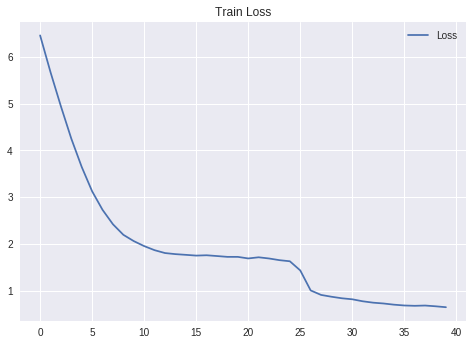

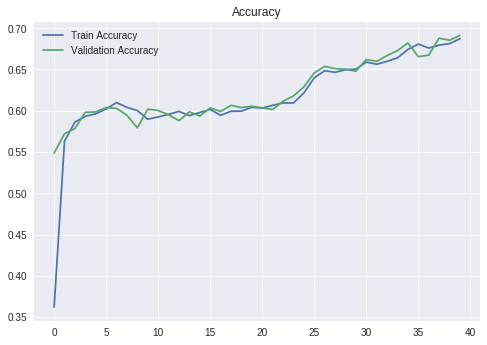

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'pool', 'conv', 'pool', 'affine', 'affine'], [[16, 3, 1], [32, 3, 1], [64, 3, 1], [128, 3, 1], [256, 3, 1], [512, 3, 1]], [[2, 2], [2, 2], [2, 2], [2, 2]], [2000, 1000, 2]]
Learning Rate: 0.001
Dropout: 0.25
Batch Norm: False
Epoch : 1 Loss : 2.591  Train Accuracy: 0.500 Validation Accuracy: 0.501
Epoch : 2 Loss : 2.579  Train Accuracy: 0.503 Validation Accuracy: 0.499
Epoch : 3 Loss : 2.551  Train Accuracy: 0.505 Validation Accuracy: 0.495
Epoch : 4 Loss : 2.568  Train Accuracy: 0.501 Validation Accuracy: 0.499
Epoch : 5 Loss : 2.551  Train Accuracy: 0.505 Validation Accuracy: 0.500
Epoch : 6 Loss : 2.572  Train Accuracy: 0.494 Validation Accuracy: 0.502
Epoch : 7 Loss : 2.559  Train Accuracy: 0.497 Validation Accuracy: 0.499
Epoch : 8 Loss : 2.527  Train Accuracy: 0.496 Validation Accuracy: 0.498
Epoch : 9 Loss : 2.556  Train Accuracy: 0.501 Validation Accuracy: 0.498
Epoch : 10 Loss : 2.528  Tr

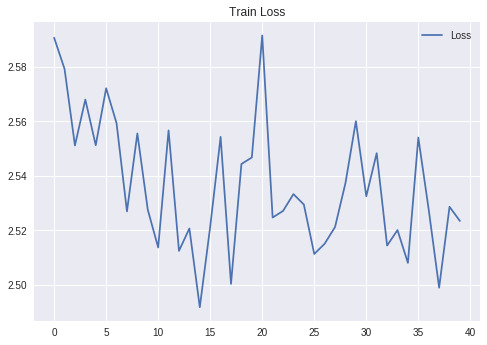

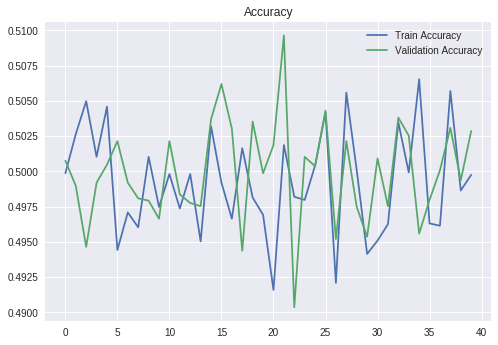

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'pool', 'conv', 'pool', 'affine', 'affine'], [[16, 3, 1], [32, 3, 1], [64, 3, 1], [128, 3, 1], [256, 3, 1], [512, 3, 1]], [[2, 2], [2, 2], [2, 2], [2, 2]], [2000, 1000, 2]]
Learning Rate: 0.001
Dropout: 0.5
Batch Norm: True
Epoch : 1 Loss : 6.419  Train Accuracy: 0.268 Validation Accuracy: 0.448
Epoch : 2 Loss : 5.733  Train Accuracy: 0.456 Validation Accuracy: 0.460
Epoch : 3 Loss : 5.074  Train Accuracy: 0.477 Validation Accuracy: 0.494
Epoch : 4 Loss : 4.446  Train Accuracy: 0.492 Validation Accuracy: 0.506
Epoch : 5 Loss : 3.824  Train Accuracy: 0.522 Validation Accuracy: 0.529
Epoch : 6 Loss : 3.212  Train Accuracy: 0.545 Validation Accuracy: 0.556
Epoch : 7 Loss : 2.719  Train Accuracy: 0.552 Validation Accuracy: 0.561
Epoch : 8 Loss : 2.339  Train Accuracy: 0.548 Validation Accuracy: 0.555
Epoch : 9 Loss : 1.990  Train Accuracy: 0.559 Validation Accuracy: 0.555
Epoch : 10 Loss : 1.786  Trai

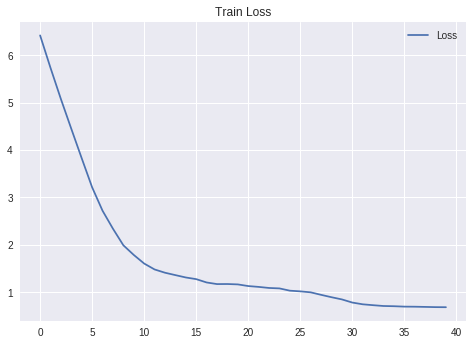

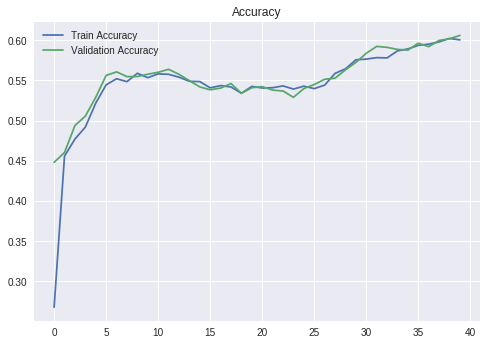

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'pool', 'conv', 'pool', 'affine', 'affine'], [[16, 3, 1], [32, 3, 1], [64, 3, 1], [128, 3, 1], [256, 3, 1], [512, 3, 1]], [[2, 2], [2, 2], [2, 2], [2, 2]], [2000, 1000, 2]]
Learning Rate: 0.001
Dropout: 0.5
Batch Norm: False
Epoch : 1 Loss : 4.195  Train Accuracy: 0.492 Validation Accuracy: 0.497
Epoch : 2 Loss : 4.130  Train Accuracy: 0.497 Validation Accuracy: 0.504
Epoch : 3 Loss : 4.079  Train Accuracy: 0.507 Validation Accuracy: 0.502
Epoch : 4 Loss : 4.102  Train Accuracy: 0.496 Validation Accuracy: 0.498
Epoch : 5 Loss : 4.081  Train Accuracy: 0.501 Validation Accuracy: 0.499
Epoch : 6 Loss : 4.050  Train Accuracy: 0.501 Validation Accuracy: 0.500
Epoch : 7 Loss : 4.085  Train Accuracy: 0.499 Validation Accuracy: 0.499
Epoch : 8 Loss : 4.084  Train Accuracy: 0.502 Validation Accuracy: 0.494
Epoch : 9 Loss : 4.080  Train Accuracy: 0.505 Validation Accuracy: 0.500
Epoch : 10 Loss : 4.049  Tra

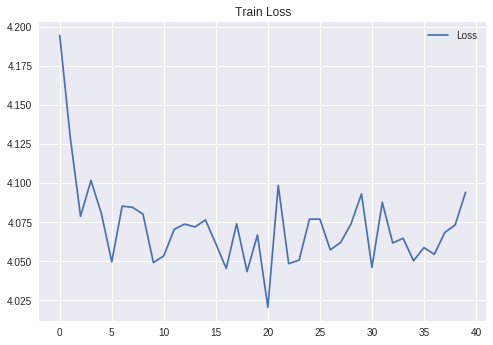

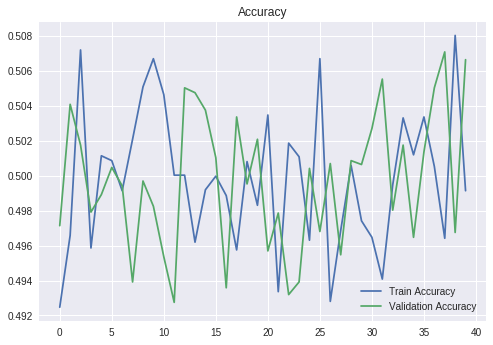

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'pool', 'conv', 'pool', 'affine', 'affine'], [[16, 3, 1], [32, 3, 1], [64, 3, 1], [128, 3, 1], [256, 3, 1], [512, 3, 1]], [[2, 2], [2, 2], [2, 2], [2, 2]], [2000, 1000, 2]]
Learning Rate: 0.0001
Dropout: 0.25
Batch Norm: True
Epoch : 1 Loss : 6.688  Train Accuracy: 0.091 Validation Accuracy: 0.166
Epoch : 2 Loss : 6.495  Train Accuracy: 0.232 Validation Accuracy: 0.303
Epoch : 3 Loss : 6.368  Train Accuracy: 0.355 Validation Accuracy: 0.416
Epoch : 4 Loss : 6.265  Train Accuracy: 0.447 Validation Accuracy: 0.481
Epoch : 5 Loss : 6.170  Train Accuracy: 0.515 Validation Accuracy: 0.532
Epoch : 6 Loss : 6.085  Train Accuracy: 0.545 Validation Accuracy: 0.541
Epoch : 7 Loss : 6.007  Train Accuracy: 0.562 Validation Accuracy: 0.567
Epoch : 8 Loss : 5.931  Train Accuracy: 0.568 Validation Accuracy: 0.576
Epoch : 9 Loss : 5.855  Train Accuracy: 0.583 Validation Accuracy: 0.586
Epoch : 10 Loss : 5.779  Tr

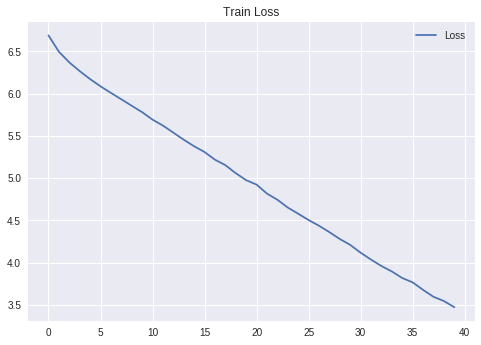

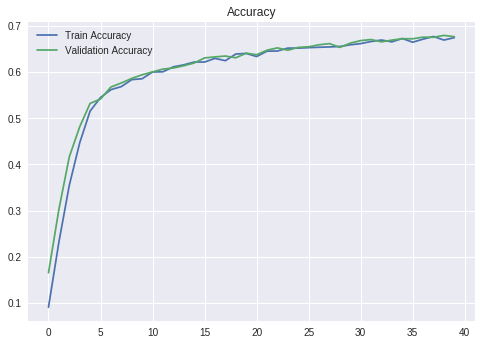

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'pool', 'conv', 'pool', 'affine', 'affine'], [[16, 3, 1], [32, 3, 1], [64, 3, 1], [128, 3, 1], [256, 3, 1], [512, 3, 1]], [[2, 2], [2, 2], [2, 2], [2, 2]], [2000, 1000, 2]]
Learning Rate: 0.0001
Dropout: 0.25
Batch Norm: False
Epoch : 1 Loss : 2.725  Train Accuracy: 0.497 Validation Accuracy: 0.506
Epoch : 2 Loss : 2.560  Train Accuracy: 0.523 Validation Accuracy: 0.537
Epoch : 3 Loss : 2.509  Train Accuracy: 0.540 Validation Accuracy: 0.558
Epoch : 4 Loss : 2.449  Train Accuracy: 0.558 Validation Accuracy: 0.573
Epoch : 5 Loss : 2.509  Train Accuracy: 0.559 Validation Accuracy: 0.577
Epoch : 6 Loss : 2.468  Train Accuracy: 0.567 Validation Accuracy: 0.581
Epoch : 7 Loss : 2.466  Train Accuracy: 0.577 Validation Accuracy: 0.581
Epoch : 8 Loss : 2.442  Train Accuracy: 0.590 Validation Accuracy: 0.588
Epoch : 9 Loss : 2.461  Train Accuracy: 0.589 Validation Accuracy: 0.558
Epoch : 10 Loss : 2.443  T

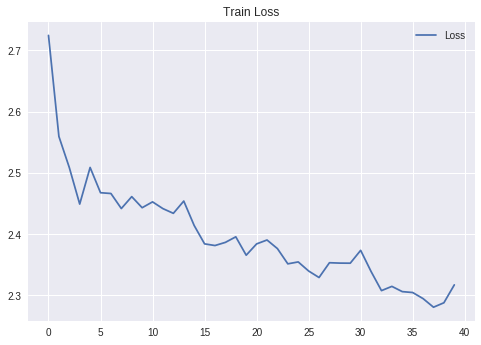

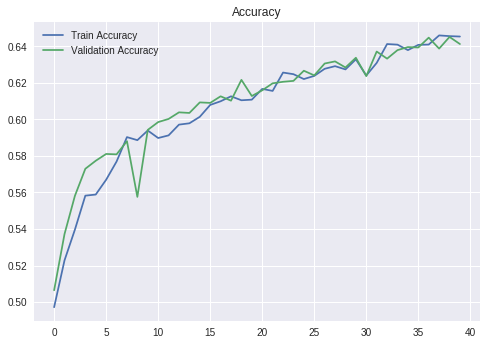

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'pool', 'conv', 'pool', 'affine', 'affine'], [[16, 3, 1], [32, 3, 1], [64, 3, 1], [128, 3, 1], [256, 3, 1], [512, 3, 1]], [[2, 2], [2, 2], [2, 2], [2, 2]], [2000, 1000, 2]]
Learning Rate: 0.0001
Dropout: 0.5
Batch Norm: True
Epoch : 1 Loss : 6.753  Train Accuracy: 0.023 Validation Accuracy: 0.047
Epoch : 2 Loss : 6.603  Train Accuracy: 0.076 Validation Accuracy: 0.113
Epoch : 3 Loss : 6.495  Train Accuracy: 0.159 Validation Accuracy: 0.200
Epoch : 4 Loss : 6.407  Train Accuracy: 0.263 Validation Accuracy: 0.306
Epoch : 5 Loss : 6.335  Train Accuracy: 0.344 Validation Accuracy: 0.366
Epoch : 6 Loss : 6.274  Train Accuracy: 0.381 Validation Accuracy: 0.392
Epoch : 7 Loss : 6.207  Train Accuracy: 0.401 Validation Accuracy: 0.406
Epoch : 8 Loss : 6.142  Train Accuracy: 0.417 Validation Accuracy: 0.422
Epoch : 9 Loss : 6.077  Train Accuracy: 0.427 Validation Accuracy: 0.439
Epoch : 10 Loss : 6.006  Tra

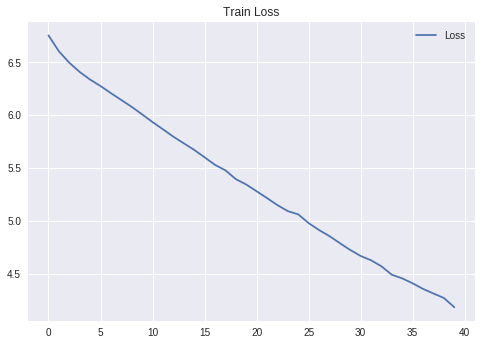

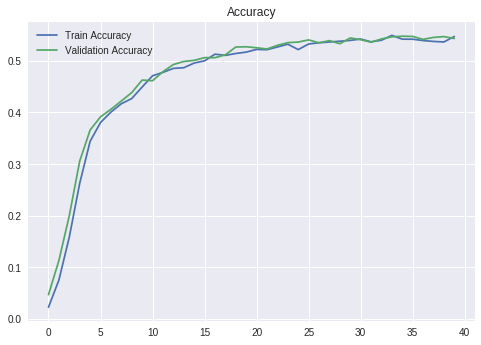

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'pool', 'conv', 'pool', 'affine', 'affine'], [[16, 3, 1], [32, 3, 1], [64, 3, 1], [128, 3, 1], [256, 3, 1], [512, 3, 1]], [[2, 2], [2, 2], [2, 2], [2, 2]], [2000, 1000, 2]]
Learning Rate: 0.0001
Dropout: 0.5
Batch Norm: False
Epoch : 1 Loss : 4.312  Train Accuracy: 0.415 Validation Accuracy: 0.466
Epoch : 2 Loss : 4.080  Train Accuracy: 0.487 Validation Accuracy: 0.495
Epoch : 3 Loss : 4.090  Train Accuracy: 0.493 Validation Accuracy: 0.505
Epoch : 4 Loss : 4.087  Train Accuracy: 0.502 Validation Accuracy: 0.508
Epoch : 5 Loss : 4.074  Train Accuracy: 0.512 Validation Accuracy: 0.507
Epoch : 6 Loss : 4.089  Train Accuracy: 0.514 Validation Accuracy: 0.519
Epoch : 7 Loss : 4.053  Train Accuracy: 0.522 Validation Accuracy: 0.522
Epoch : 8 Loss : 4.063  Train Accuracy: 0.523 Validation Accuracy: 0.518
Epoch : 9 Loss : 4.068  Train Accuracy: 0.521 Validation Accuracy: 0.527
Epoch : 10 Loss : 4.039  Tr

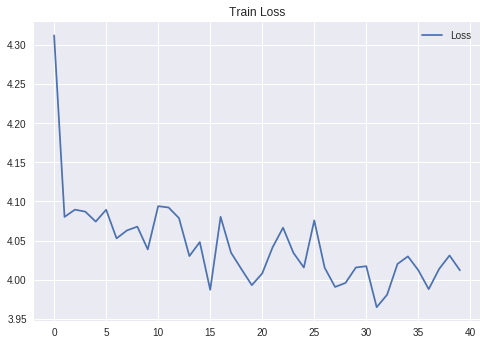

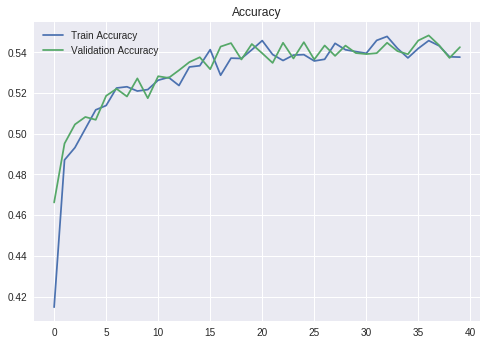

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'pool', 'affine', 'affine'], [[16, 3, 1], [32, 3, 1], [64, 3, 1], [128, 3, 1], [256, 3, 1]], [[2, 2], [2, 2], [2, 2]], [2000, 1000, 2]]
Learning Rate: 0.001
Dropout: 0.25
Batch Norm: True
Epoch : 1 Loss : 6.382  Train Accuracy: 0.370 Validation Accuracy: 0.529
Epoch : 2 Loss : 5.571  Train Accuracy: 0.565 Validation Accuracy: 0.563
Epoch : 3 Loss : 4.831  Train Accuracy: 0.586 Validation Accuracy: 0.591
Epoch : 4 Loss : 4.162  Train Accuracy: 0.592 Validation Accuracy: 0.596
Epoch : 5 Loss : 3.550  Train Accuracy: 0.599 Validation Accuracy: 0.608
Epoch : 6 Loss : 3.058  Train Accuracy: 0.603 Validation Accuracy: 0.605
Epoch : 7 Loss : 2.652  Train Accuracy: 0.605 Validation Accuracy: 0.603
Epoch : 8 Loss : 2.380  Train Accuracy: 0.604 Validation Accuracy: 0.607
Epoch : 9 Loss : 2.150  Train Accuracy: 0.607 Validation Accuracy: 0.606
Epoch : 10 Loss : 2.010  Train Accuracy: 0.604 Validation Accurac

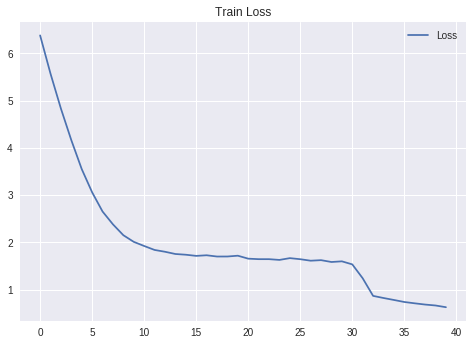

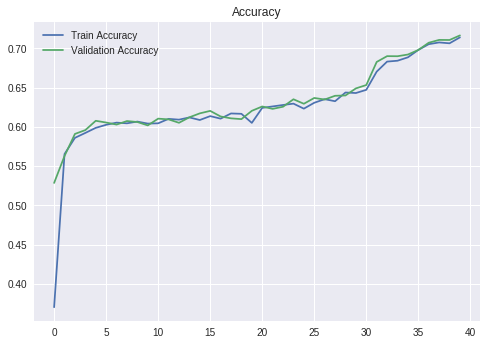

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'pool', 'affine', 'affine'], [[16, 3, 1], [32, 3, 1], [64, 3, 1], [128, 3, 1], [256, 3, 1]], [[2, 2], [2, 2], [2, 2]], [2000, 1000, 2]]
Learning Rate: 0.001
Dropout: 0.25
Batch Norm: False
Epoch : 1 Loss : 2.643  Train Accuracy: 0.510 Validation Accuracy: 0.529
Epoch : 2 Loss : 2.527  Train Accuracy: 0.526 Validation Accuracy: 0.543
Epoch : 3 Loss : 2.546  Train Accuracy: 0.544 Validation Accuracy: 0.557
Epoch : 4 Loss : 2.553  Train Accuracy: 0.551 Validation Accuracy: 0.574
Epoch : 5 Loss : 2.527  Train Accuracy: 0.562 Validation Accuracy: 0.564
Epoch : 6 Loss : 2.532  Train Accuracy: 0.562 Validation Accuracy: 0.548
Epoch : 7 Loss : 2.558  Train Accuracy: 0.566 Validation Accuracy: 0.570
Epoch : 8 Loss : 2.493  Train Accuracy: 0.572 Validation Accuracy: 0.587
Epoch : 9 Loss : 2.471  Train Accuracy: 0.582 Validation Accuracy: 0.577
Epoch : 10 Loss : 2.494  Train Accuracy: 0.587 Validation Accura

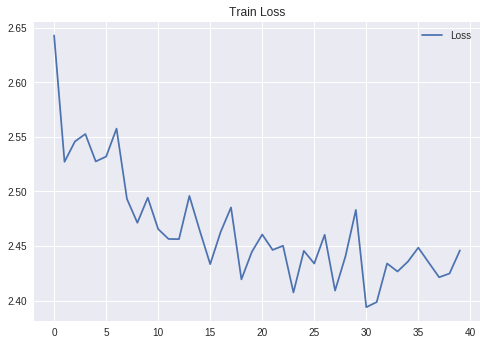

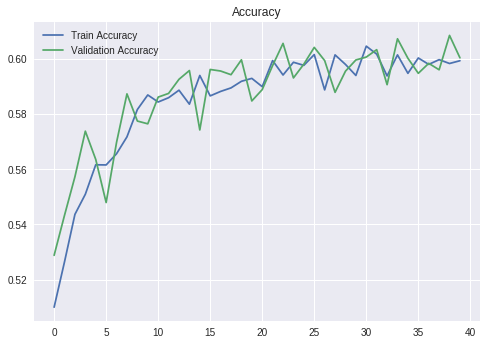

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'pool', 'affine', 'affine'], [[16, 3, 1], [32, 3, 1], [64, 3, 1], [128, 3, 1], [256, 3, 1]], [[2, 2], [2, 2], [2, 2]], [2000, 1000, 2]]
Learning Rate: 0.001
Dropout: 0.5
Batch Norm: True
Epoch : 1 Loss : 6.410  Train Accuracy: 0.276 Validation Accuracy: 0.460
Epoch : 2 Loss : 5.720  Train Accuracy: 0.481 Validation Accuracy: 0.494
Epoch : 3 Loss : 5.117  Train Accuracy: 0.493 Validation Accuracy: 0.502
Epoch : 4 Loss : 4.571  Train Accuracy: 0.508 Validation Accuracy: 0.513
Epoch : 5 Loss : 4.087  Train Accuracy: 0.517 Validation Accuracy: 0.521
Epoch : 6 Loss : 3.706  Train Accuracy: 0.526 Validation Accuracy: 0.521
Epoch : 7 Loss : 3.391  Train Accuracy: 0.537 Validation Accuracy: 0.538
Epoch : 8 Loss : 3.096  Train Accuracy: 0.550 Validation Accuracy: 0.558
Epoch : 9 Loss : 2.713  Train Accuracy: 0.565 Validation Accuracy: 0.571
Epoch : 10 Loss : 2.141  Train Accuracy: 0.574 Validation Accuracy

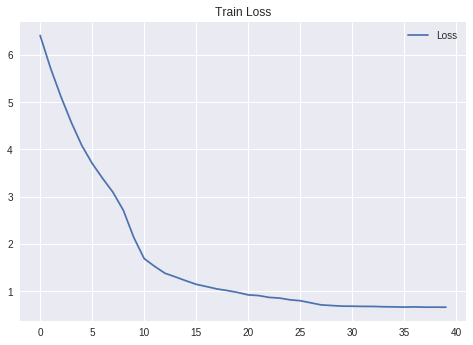

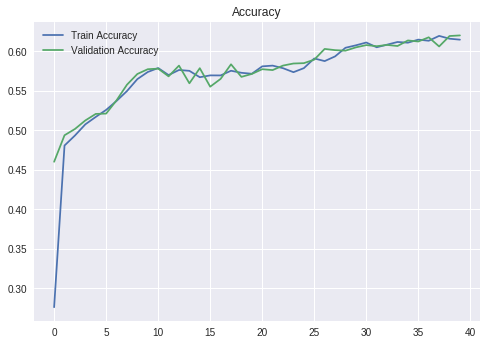

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'pool', 'affine', 'affine'], [[16, 3, 1], [32, 3, 1], [64, 3, 1], [128, 3, 1], [256, 3, 1]], [[2, 2], [2, 2], [2, 2]], [2000, 1000, 2]]
Learning Rate: 0.001
Dropout: 0.5
Batch Norm: False
Epoch : 1 Loss : 4.228  Train Accuracy: 0.498 Validation Accuracy: 0.499
Epoch : 2 Loss : 4.157  Train Accuracy: 0.501 Validation Accuracy: 0.501
Epoch : 3 Loss : 4.039  Train Accuracy: 0.507 Validation Accuracy: 0.501
Epoch : 4 Loss : 4.049  Train Accuracy: 0.500 Validation Accuracy: 0.499
Epoch : 5 Loss : 4.064  Train Accuracy: 0.503 Validation Accuracy: 0.497
Epoch : 6 Loss : 4.097  Train Accuracy: 0.499 Validation Accuracy: 0.510
Epoch : 7 Loss : 4.077  Train Accuracy: 0.496 Validation Accuracy: 0.498
Epoch : 8 Loss : 4.067  Train Accuracy: 0.502 Validation Accuracy: 0.505
Epoch : 9 Loss : 4.104  Train Accuracy: 0.499 Validation Accuracy: 0.498
Epoch : 10 Loss : 4.011  Train Accuracy: 0.501 Validation Accurac

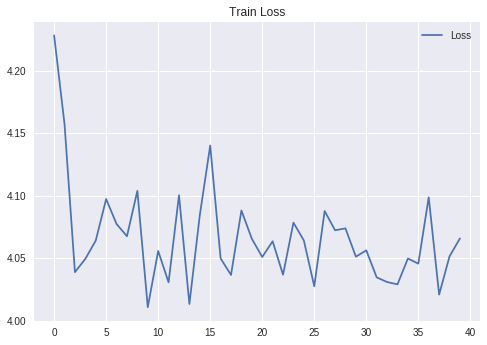

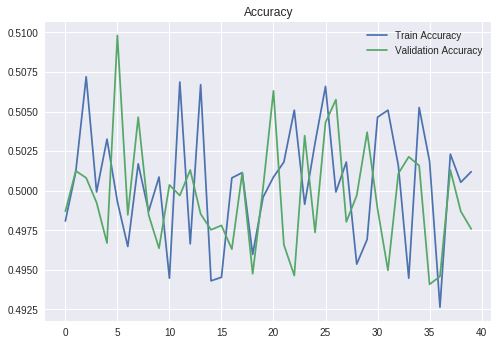

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'pool', 'affine', 'affine'], [[16, 3, 1], [32, 3, 1], [64, 3, 1], [128, 3, 1], [256, 3, 1]], [[2, 2], [2, 2], [2, 2]], [2000, 1000, 2]]
Learning Rate: 0.0001
Dropout: 0.25
Batch Norm: True
Epoch : 1 Loss : 6.930  Train Accuracy: 0.001 Validation Accuracy: 0.005
Epoch : 2 Loss : 6.764  Train Accuracy: 0.033 Validation Accuracy: 0.084
Epoch : 3 Loss : 6.650  Train Accuracy: 0.164 Validation Accuracy: 0.241
Epoch : 4 Loss : 6.554  Train Accuracy: 0.303 Validation Accuracy: 0.373
Epoch : 5 Loss : 6.469  Train Accuracy: 0.432 Validation Accuracy: 0.481
Epoch : 6 Loss : 6.382  Train Accuracy: 0.522 Validation Accuracy: 0.550
Epoch : 7 Loss : 6.302  Train Accuracy: 0.567 Validation Accuracy: 0.579
Epoch : 8 Loss : 6.232  Train Accuracy: 0.575 Validation Accuracy: 0.593
Epoch : 9 Loss : 6.154  Train Accuracy: 0.592 Validation Accuracy: 0.595
Epoch : 10 Loss : 6.072  Train Accuracy: 0.601 Validation Accura

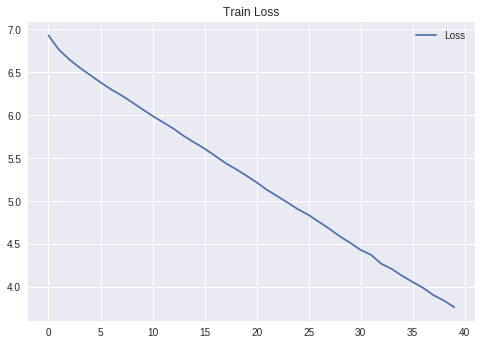

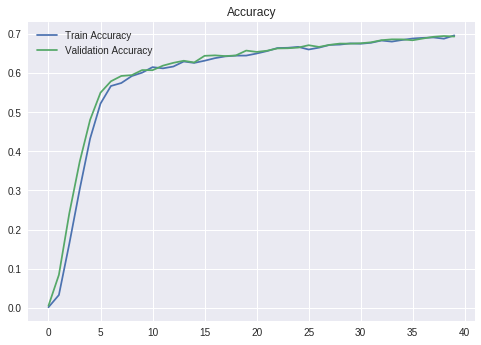

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'pool', 'affine', 'affine'], [[16, 3, 1], [32, 3, 1], [64, 3, 1], [128, 3, 1], [256, 3, 1]], [[2, 2], [2, 2], [2, 2]], [2000, 1000, 2]]
Learning Rate: 0.0001
Dropout: 0.25
Batch Norm: False
Epoch : 1 Loss : 2.764  Train Accuracy: 0.503 Validation Accuracy: 0.516
Epoch : 2 Loss : 2.562  Train Accuracy: 0.529 Validation Accuracy: 0.550
Epoch : 3 Loss : 2.514  Train Accuracy: 0.550 Validation Accuracy: 0.541
Epoch : 4 Loss : 2.511  Train Accuracy: 0.555 Validation Accuracy: 0.569
Epoch : 5 Loss : 2.460  Train Accuracy: 0.572 Validation Accuracy: 0.578
Epoch : 6 Loss : 2.500  Train Accuracy: 0.568 Validation Accuracy: 0.568
Epoch : 7 Loss : 2.459  Train Accuracy: 0.580 Validation Accuracy: 0.550
Epoch : 8 Loss : 2.466  Train Accuracy: 0.583 Validation Accuracy: 0.584
Epoch : 9 Loss : 2.458  Train Accuracy: 0.582 Validation Accuracy: 0.583
Epoch : 10 Loss : 2.442  Train Accuracy: 0.589 Validation Accur

In [0]:

hyperparameters = {
    'arch': [[['conv','conv','pool','conv','conv','pool','conv','pool','conv','pool','affine','affine'],[[16,3,1],[32,3,1],[64,3,1],[128,3,1],[256,3,1],[512,3,1]],[[2,2],[2,2],[2,2],[2,2]],[2000,1000,2]], # largest network
             [['conv','conv','pool','conv','conv','pool','conv','pool','affine','affine'],[[16,3,1],[32,3,1],[64,3,1],[128,3,1],[256,3,1]],[[2,2],[2,2],[2,2]],[2000,1000,2]], #medium network
             [['conv','conv','pool','conv','conv','pool','affine','affine'],[[16,3,1],[32,3,1],[64,3,1],[128,3,1]],[[2,2],[2,2]],[2000,1000,2]] #small network            
            ],
    'lrs': [1e-3,1e-4],
    'dropout': [0.25,0.5],
    'batch_norm': [True,False]   
}

loss_crit = nn.CrossEntropyLoss().cuda(device=0)

epochs=40
bestNet = None
curr_max_val = 0
best_prec1 = 0
cudnn.benchmark = True
for i,arch in enumerate(hyperparameters['arch']):
  for lr in hyperparameters['lrs']:
    for dropout in hyperparameters['dropout']:
      for bnorm in hyperparameters['batch_norm']:
        print('Hyper parameters:')
        print('Architecture: '+ repr(arch))
        print('Learning Rate: ' + repr(lr))
        print('Dropout: ' + repr(dropout))
        print('Batch Norm: ' + repr(bnorm))
        model = NeuralNet(arch[0],arch[1],arch[2],arch[3],loss_crit,dropout,batch_norm=bnorm)

        model.myparameters = model.myparameters.cuda(device=0)
        optimizer = optimizer = torch.optim.Adam(model.myparameters,lr=lr)
        train_results = model.train_model(train_loader,optimizer, epochs, val_loader, verbose=True)
        (bestNetwork, epoch_loss, train_accuracy, val_accuracy, test_accuracy) = train_results
        if max(val_accuracy)> curr_max_val:
          bestNet = bestNetwork

          save_checkpoint({
            'epoch': epochs + 1,
            'arch': repr(i),
            'state_dict': bestNet.state_dict(),
            'best_prec1': max(val_accuracy),
          },max(val_accuracy)>=curr_max_val,i)
          curr_max_val = max(val_accuracy)
        plt.plot(epoch_loss, label='Loss')
        plt.legend()
        plt.title('Train Loss')
        plt.show()
        plt.plot(train_accuracy, label = 'Train Accuracy')
        plt.plot(val_accuracy, label='Validation Accuracy')
        plt.title('Accuracy')
        plt.legend()
        plt.show()

Kernel died. Rerunning tests.

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'pool', 'affine', 'affine'], [[16, 3, 1], [32, 3, 1], [64, 3, 1], [128, 3, 1], [256, 3, 1]], [[2, 2], [2, 2], [2, 2]], [2000, 1000, 2]]
Learning Rate: 0.0001
Dropout: 0.25
Batch Norm: True
Epoch : 1 Loss : 6.765  Train Accuracy: 0.080 Validation Accuracy: 0.119
Epoch : 2 Loss : 6.576  Train Accuracy: 0.165 Validation Accuracy: 0.221
Epoch : 3 Loss : 6.457  Train Accuracy: 0.275 Validation Accuracy: 0.330
Epoch : 4 Loss : 6.345  Train Accuracy: 0.402 Validation Accuracy: 0.462
Epoch : 5 Loss : 6.256  Train Accuracy: 0.493 Validation Accuracy: 0.532
Epoch : 6 Loss : 6.169  Train Accuracy: 0.550 Validation Accuracy: 0.558
Epoch : 7 Loss : 6.087  Train Accuracy: 0.572 Validation Accuracy: 0.573
Epoch : 8 Loss : 6.016  Train Accuracy: 0.574 Validation Accuracy: 0.585
Epoch : 9 Loss : 5.936  Train Accuracy: 0.590 Validation Accuracy: 0.597
Epoch : 10 Loss : 5.855  Train Accuracy: 0.596 Validation Accura

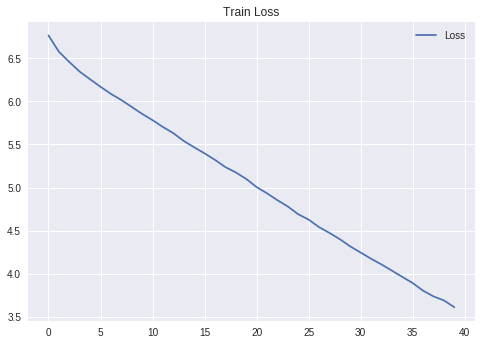

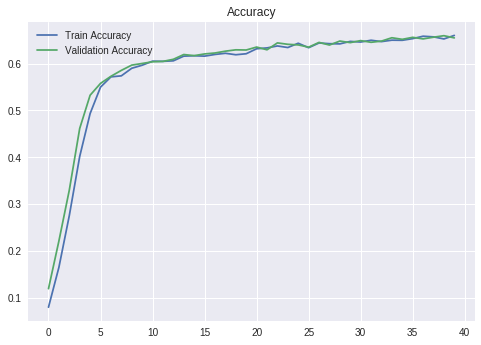

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'pool', 'affine', 'affine'], [[16, 3, 1], [32, 3, 1], [64, 3, 1], [128, 3, 1], [256, 3, 1]], [[2, 2], [2, 2], [2, 2]], [2000, 1000, 2]]
Learning Rate: 0.0001
Dropout: 0.25
Batch Norm: False
Epoch : 1 Loss : 2.739  Train Accuracy: 0.499 Validation Accuracy: 0.527
Epoch : 2 Loss : 2.501  Train Accuracy: 0.528 Validation Accuracy: 0.535
Epoch : 3 Loss : 2.499  Train Accuracy: 0.542 Validation Accuracy: 0.560
Epoch : 4 Loss : 2.471  Train Accuracy: 0.556 Validation Accuracy: 0.548
Epoch : 5 Loss : 2.455  Train Accuracy: 0.558 Validation Accuracy: 0.568
Epoch : 6 Loss : 2.517  Train Accuracy: 0.571 Validation Accuracy: 0.582
Epoch : 7 Loss : 2.476  Train Accuracy: 0.574 Validation Accuracy: 0.589
Epoch : 8 Loss : 2.471  Train Accuracy: 0.577 Validation Accuracy: 0.587
Epoch : 9 Loss : 2.520  Train Accuracy: 0.580 Validation Accuracy: 0.586
Epoch : 10 Loss : 2.446  Train Accuracy: 0.585 Validation Accur

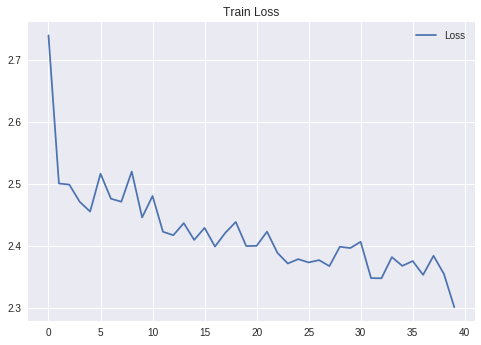

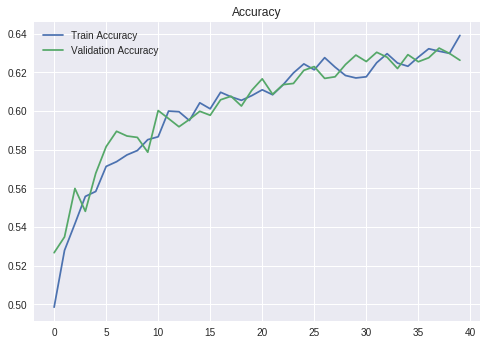

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'pool', 'affine', 'affine'], [[16, 3, 1], [32, 3, 1], [64, 3, 1], [128, 3, 1], [256, 3, 1]], [[2, 2], [2, 2], [2, 2]], [2000, 1000, 2]]
Learning Rate: 0.0001
Dropout: 0.5
Batch Norm: True
Epoch : 1 Loss : 6.816  Train Accuracy: 0.001 Validation Accuracy: 0.006
Epoch : 2 Loss : 6.661  Train Accuracy: 0.027 Validation Accuracy: 0.059
Epoch : 3 Loss : 6.563  Train Accuracy: 0.104 Validation Accuracy: 0.164
Epoch : 4 Loss : 6.483  Train Accuracy: 0.208 Validation Accuracy: 0.260
Epoch : 5 Loss : 6.413  Train Accuracy: 0.299 Validation Accuracy: 0.331
Epoch : 6 Loss : 6.356  Train Accuracy: 0.356 Validation Accuracy: 0.374
Epoch : 7 Loss : 6.298  Train Accuracy: 0.376 Validation Accuracy: 0.375
Epoch : 8 Loss : 6.245  Train Accuracy: 0.382 Validation Accuracy: 0.382
Epoch : 9 Loss : 6.187  Train Accuracy: 0.385 Validation Accuracy: 0.395
Epoch : 10 Loss : 6.127  Train Accuracy: 0.391 Validation Accurac

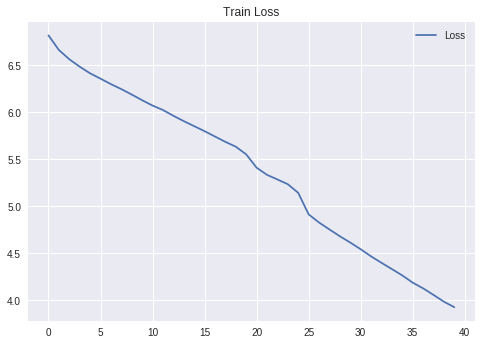

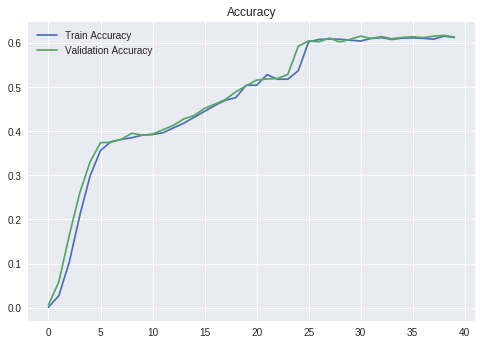

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'pool', 'affine', 'affine'], [[16, 3, 1], [32, 3, 1], [64, 3, 1], [128, 3, 1], [256, 3, 1]], [[2, 2], [2, 2], [2, 2]], [2000, 1000, 2]]
Learning Rate: 0.0001
Dropout: 0.5
Batch Norm: False
Epoch : 1 Loss : 4.368  Train Accuracy: 0.402 Validation Accuracy: 0.454
Epoch : 2 Loss : 4.092  Train Accuracy: 0.487 Validation Accuracy: 0.491
Epoch : 3 Loss : 4.121  Train Accuracy: 0.496 Validation Accuracy: 0.491
Epoch : 4 Loss : 4.133  Train Accuracy: 0.499 Validation Accuracy: 0.510
Epoch : 5 Loss : 4.057  Train Accuracy: 0.511 Validation Accuracy: 0.511
Epoch : 6 Loss : 4.057  Train Accuracy: 0.516 Validation Accuracy: 0.522
Epoch : 7 Loss : 4.098  Train Accuracy: 0.519 Validation Accuracy: 0.514
Epoch : 8 Loss : 4.036  Train Accuracy: 0.531 Validation Accuracy: 0.524
Epoch : 9 Loss : 4.074  Train Accuracy: 0.531 Validation Accuracy: 0.531
Epoch : 10 Loss : 4.069  Train Accuracy: 0.523 Validation Accura

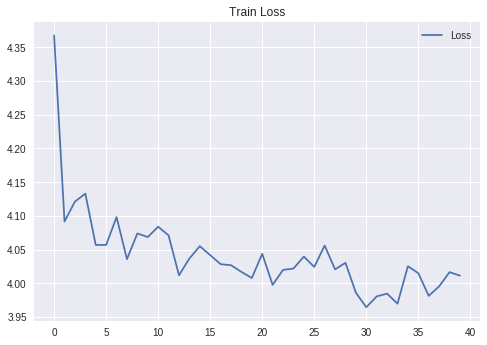

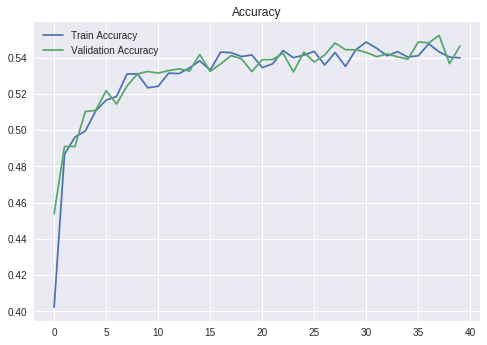

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'affine', 'affine'], [[16, 3, 1], [32, 3, 1], [64, 3, 1], [128, 3, 1]], [[2, 2], [2, 2]], [2000, 1000, 2]]
Learning Rate: 0.001
Dropout: 0.25
Batch Norm: True
Epoch : 1 Loss : 6.510  Train Accuracy: 0.339 Validation Accuracy: 0.556
Epoch : 2 Loss : 5.728  Train Accuracy: 0.564 Validation Accuracy: 0.589
Epoch : 3 Loss : 4.990  Train Accuracy: 0.587 Validation Accuracy: 0.596
Epoch : 4 Loss : 4.284  Train Accuracy: 0.609 Validation Accuracy: 0.614
Epoch : 5 Loss : 3.688  Train Accuracy: 0.606 Validation Accuracy: 0.611
Epoch : 6 Loss : 3.153  Train Accuracy: 0.617 Validation Accuracy: 0.618
Epoch : 7 Loss : 2.762  Train Accuracy: 0.619 Validation Accuracy: 0.619
Epoch : 8 Loss : 2.446  Train Accuracy: 0.624 Validation Accuracy: 0.620
Epoch : 9 Loss : 2.254  Train Accuracy: 0.624 Validation Accuracy: 0.620
Epoch : 10 Loss : 2.108  Train Accuracy: 0.613 Validation Accuracy: 0.616
Epoch : 11 Loss : 1.987  Tra

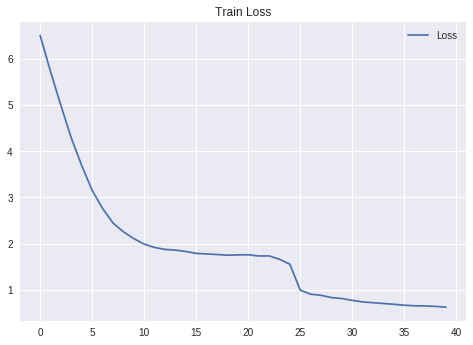

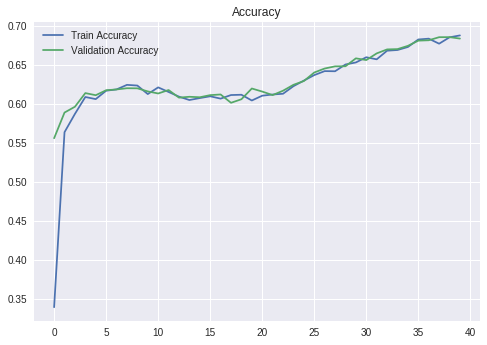

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'affine', 'affine'], [[16, 3, 1], [32, 3, 1], [64, 3, 1], [128, 3, 1]], [[2, 2], [2, 2]], [2000, 1000, 2]]
Learning Rate: 0.001
Dropout: 0.25
Batch Norm: False
Epoch : 1 Loss : 2.701  Train Accuracy: 0.518 Validation Accuracy: 0.545
Epoch : 2 Loss : 2.573  Train Accuracy: 0.541 Validation Accuracy: 0.542
Epoch : 3 Loss : 2.526  Train Accuracy: 0.549 Validation Accuracy: 0.543
Epoch : 4 Loss : 2.561  Train Accuracy: 0.553 Validation Accuracy: 0.542
Epoch : 5 Loss : 2.513  Train Accuracy: 0.564 Validation Accuracy: 0.551
Epoch : 6 Loss : 2.523  Train Accuracy: 0.564 Validation Accuracy: 0.581
Epoch : 7 Loss : 2.484  Train Accuracy: 0.577 Validation Accuracy: 0.584
Epoch : 8 Loss : 2.479  Train Accuracy: 0.575 Validation Accuracy: 0.552
Epoch : 9 Loss : 2.482  Train Accuracy: 0.578 Validation Accuracy: 0.585
Epoch : 10 Loss : 2.462  Train Accuracy: 0.581 Validation Accuracy: 0.592
Epoch : 11 Loss : 2.453  Tr

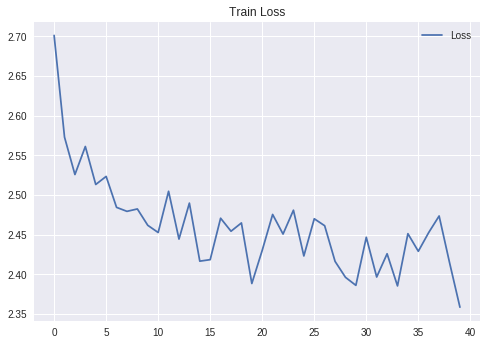

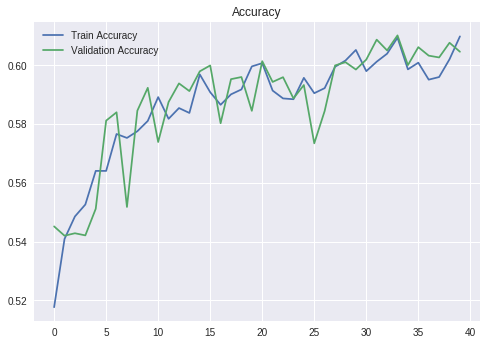

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'affine', 'affine'], [[16, 3, 1], [32, 3, 1], [64, 3, 1], [128, 3, 1]], [[2, 2], [2, 2]], [2000, 1000, 2]]
Learning Rate: 0.001
Dropout: 0.5
Batch Norm: True
Epoch : 1 Loss : 6.414  Train Accuracy: 0.283 Validation Accuracy: 0.494
Epoch : 2 Loss : 5.696  Train Accuracy: 0.520 Validation Accuracy: 0.528
Epoch : 3 Loss : 5.009  Train Accuracy: 0.534 Validation Accuracy: 0.538
Epoch : 4 Loss : 4.345  Train Accuracy: 0.541 Validation Accuracy: 0.560
Epoch : 5 Loss : 3.700  Train Accuracy: 0.559 Validation Accuracy: 0.561
Epoch : 6 Loss : 3.143  Train Accuracy: 0.564 Validation Accuracy: 0.554
Epoch : 7 Loss : 2.665  Train Accuracy: 0.567 Validation Accuracy: 0.566
Epoch : 8 Loss : 2.304  Train Accuracy: 0.575 Validation Accuracy: 0.575
Epoch : 9 Loss : 2.013  Train Accuracy: 0.571 Validation Accuracy: 0.576
Epoch : 10 Loss : 1.755  Train Accuracy: 0.576 Validation Accuracy: 0.573
Epoch : 11 Loss : 1.610  Trai

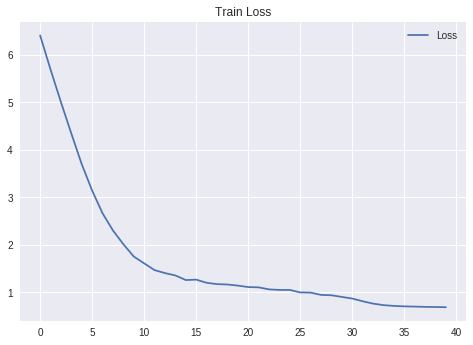

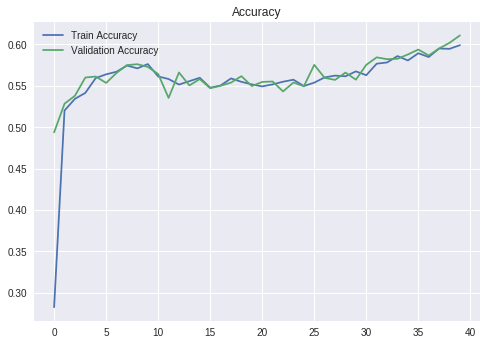

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'affine', 'affine'], [[16, 3, 1], [32, 3, 1], [64, 3, 1], [128, 3, 1]], [[2, 2], [2, 2]], [2000, 1000, 2]]
Learning Rate: 0.001
Dropout: 0.5
Batch Norm: False
Epoch : 1 Loss : 4.296  Train Accuracy: 0.494 Validation Accuracy: 0.488
Epoch : 2 Loss : 4.198  Train Accuracy: 0.503 Validation Accuracy: 0.496
Epoch : 3 Loss : 4.070  Train Accuracy: 0.505 Validation Accuracy: 0.504
Epoch : 4 Loss : 4.056  Train Accuracy: 0.504 Validation Accuracy: 0.503
Epoch : 5 Loss : 4.048  Train Accuracy: 0.506 Validation Accuracy: 0.505
Epoch : 6 Loss : 4.074  Train Accuracy: 0.504 Validation Accuracy: 0.497
Epoch : 7 Loss : 4.002  Train Accuracy: 0.511 Validation Accuracy: 0.498
Epoch : 8 Loss : 4.070  Train Accuracy: 0.496 Validation Accuracy: 0.499
Epoch : 9 Loss : 4.139  Train Accuracy: 0.496 Validation Accuracy: 0.496
Epoch : 10 Loss : 4.066  Train Accuracy: 0.500 Validation Accuracy: 0.497
Epoch : 11 Loss : 4.098  Tra

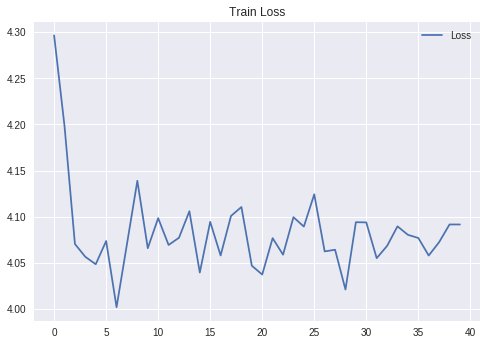

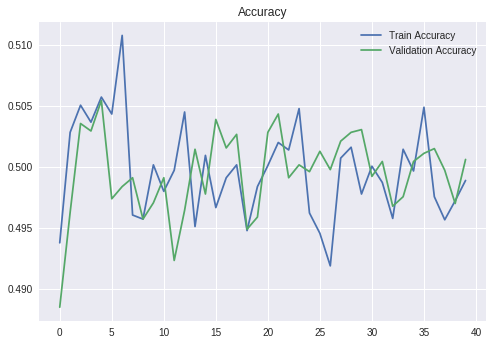

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'affine', 'affine'], [[16, 3, 1], [32, 3, 1], [64, 3, 1], [128, 3, 1]], [[2, 2], [2, 2]], [2000, 1000, 2]]
Learning Rate: 0.0001
Dropout: 0.25
Batch Norm: True
Epoch : 1 Loss : 6.923  Train Accuracy: 0.001 Validation Accuracy: 0.004
Epoch : 2 Loss : 6.761  Train Accuracy: 0.030 Validation Accuracy: 0.066
Epoch : 3 Loss : 6.642  Train Accuracy: 0.135 Validation Accuracy: 0.215
Epoch : 4 Loss : 6.543  Train Accuracy: 0.302 Validation Accuracy: 0.382
Epoch : 5 Loss : 6.459  Train Accuracy: 0.455 Validation Accuracy: 0.508
Epoch : 6 Loss : 6.372  Train Accuracy: 0.558 Validation Accuracy: 0.596
Epoch : 7 Loss : 6.293  Train Accuracy: 0.608 Validation Accuracy: 0.622
Epoch : 8 Loss : 6.217  Train Accuracy: 0.626 Validation Accuracy: 0.633
Epoch : 9 Loss : 6.139  Train Accuracy: 0.637 Validation Accuracy: 0.643
Epoch : 10 Loss : 6.060  Train Accuracy: 0.642 Validation Accuracy: 0.651
Epoch : 11 Loss : 5.977  Tr

In [0]:

hyperparameters = {
    'arch': [[['conv','conv','pool','conv','conv','pool','conv','pool','affine','affine'],[[16,3,1],[32,3,1],[64,3,1],[128,3,1],[256,3,1]],[[2,2],[2,2],[2,2]],[2000,1000,2]], #medium network
             [['conv','conv','pool','conv','conv','pool','affine','affine'],[[16,3,1],[32,3,1],[64,3,1],[128,3,1]],[[2,2],[2,2]],[2000,1000,2]] #small network            
            ],
    'lrs': [1e-3,1e-4],
    'dropout': [0.25,0.5],
    'batch_norm': [True,False]   
}

loss_crit = nn.CrossEntropyLoss().cuda(device=0)

epochs=40
bestNet = None
curr_max_val = 0
best_prec1 = 0
cudnn.benchmark = True
test_number=0
for i,arch in enumerate(hyperparameters['arch']):
  for lr in hyperparameters['lrs']:
    for dropout in hyperparameters['dropout']:
      for bnorm in hyperparameters['batch_norm']:
        test_number+=1
        if (test_number>4): # Skip first 5 tests as they are complete
          
          print('Hyper parameters:')
          print('Architecture: '+ repr(arch))
          print('Learning Rate: ' + repr(lr))
          print('Dropout: ' + repr(dropout))
          print('Batch Norm: ' + repr(bnorm))
          model = NeuralNet(arch[0],arch[1],arch[2],arch[3],loss_crit,dropout,batch_norm=bnorm)

          model.myparameters = model.myparameters.cuda(device=0)
          optimizer = optimizer = torch.optim.Adam(model.myparameters,lr=lr)
          train_results = model.train_model(train_loader,optimizer, epochs, val_loader, verbose=True)
          (bestNetwork, epoch_loss, train_accuracy, val_accuracy, test_accuracy) = train_results
          if max(val_accuracy)> curr_max_val:
            bestNet = bestNetwork

            save_checkpoint({
              'epoch': epochs + 1,
              'arch': repr(i),
              'state_dict': bestNet.state_dict(),
              'best_prec1': max(val_accuracy),
            },max(val_accuracy)>=curr_max_val,i)
            curr_max_val = max(val_accuracy)
          plt.plot(epoch_loss, label='Loss')
          plt.legend()
          plt.title('Train Loss')
          plt.show()
          plt.plot(train_accuracy, label = 'Train Accuracy')
          plt.plot(val_accuracy, label='Validation Accuracy')
          plt.title('Accuracy')
          plt.legend()
          plt.show()         

### Large Networks hyper parameter search

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'conv', 'conv', 'pool', 'conv', 'conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'affine', 'affine', 'affine', 'affine'], [[64, 3, 1], [64, 3, 1], [128, 3, 1], [128, 3, 1], [256, 3, 1], [256, 3, 1], [256, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1]], [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2]], [1024, 1024, 250, 2]]
Learning Rate: 0.01
Dropout: 0.25
Batch Norm: True
Epoch : 1 Loss : 0.695  Train Accuracy: 0.521 Validation Accuracy: 0.516
Epoch : 2 Loss : 0.691  Train Accuracy: 0.528 Validation Accuracy: 0.537
Epoch : 3 Loss : 0.689  Train Accuracy: 0.538 Validation Accuracy: 0.548
Epoch : 4 Loss : 0.687  Train Accuracy: 0.551 Validation Accuracy: 0.556
Epoch : 5 Loss : 0.683  Train Accuracy: 0.561 Validation Accuracy: 0.566
Epoch : 6 Loss : 0.684  Train Accuracy: 0.559 Validation Accuracy: 0.564
Epoch : 7 Loss : 0.682  Train Accuracy: 0.564 Validation Accuracy: 

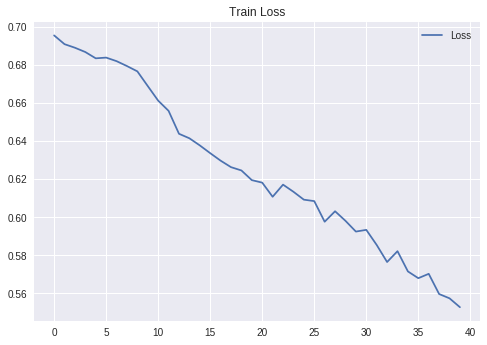

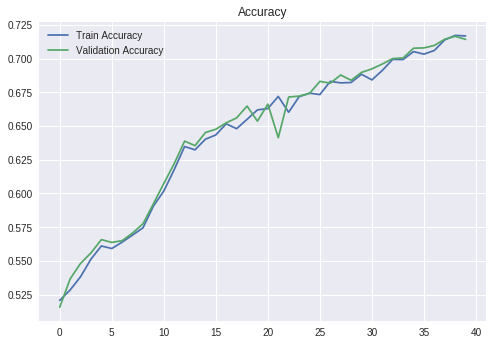

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'conv', 'conv', 'pool', 'conv', 'conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'affine', 'affine', 'affine', 'affine'], [[64, 3, 1], [64, 3, 1], [128, 3, 1], [128, 3, 1], [256, 3, 1], [256, 3, 1], [256, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1]], [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2]], [1024, 1024, 250, 2]]
Learning Rate: 0.01
Dropout: 0.5
Batch Norm: True
Epoch : 1 Loss : 0.693  Train Accuracy: 0.510 Validation Accuracy: 0.517
Epoch : 2 Loss : 0.692  Train Accuracy: 0.523 Validation Accuracy: 0.524
Epoch : 3 Loss : 0.692  Train Accuracy: 0.519 Validation Accuracy: 0.519
Epoch : 4 Loss : 0.691  Train Accuracy: 0.529 Validation Accuracy: 0.537
Epoch : 5 Loss : 0.689  Train Accuracy: 0.548 Validation Accuracy: 0.537
Epoch : 6 Loss : 0.690  Train Accuracy: 0.537 Validation Accuracy: 0.543
Epoch : 7 Loss : 0.689  Train Accuracy: 0.533 Validation Accuracy: 0

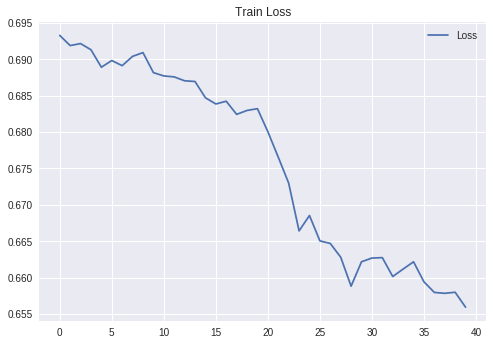

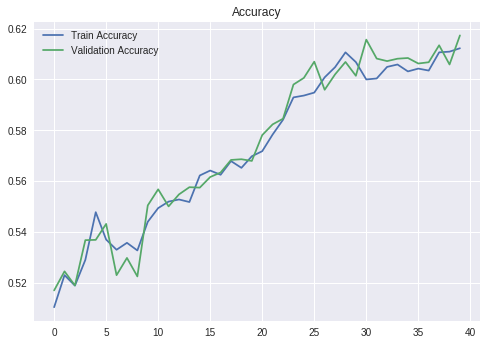

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'conv', 'conv', 'pool', 'conv', 'conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'affine', 'affine', 'affine', 'affine'], [[64, 3, 1], [64, 3, 1], [128, 3, 1], [128, 3, 1], [256, 3, 1], [256, 3, 1], [256, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1]], [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2]], [1024, 1024, 250, 2]]
Learning Rate: 0.005
Dropout: 0.25
Batch Norm: True
Epoch : 1 Loss : 0.694  Train Accuracy: 0.512 Validation Accuracy: 0.515
Epoch : 2 Loss : 0.691  Train Accuracy: 0.524 Validation Accuracy: 0.537
Epoch : 3 Loss : 0.691  Train Accuracy: 0.527 Validation Accuracy: 0.550
Epoch : 4 Loss : 0.687  Train Accuracy: 0.548 Validation Accuracy: 0.555
Epoch : 5 Loss : 0.684  Train Accuracy: 0.558 Validation Accuracy: 0.563
Epoch : 6 Loss : 0.682  Train Accuracy: 0.568 Validation Accuracy: 0.575
Epoch : 7 Loss : 0.669  Train Accuracy: 0.590 Validation Accuracy:

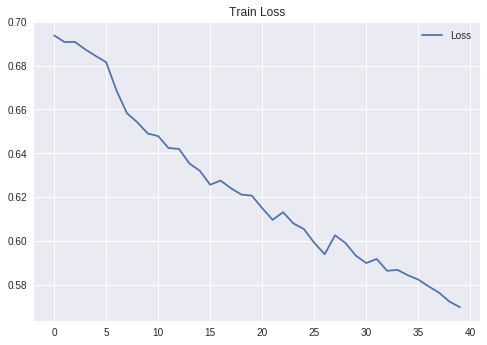

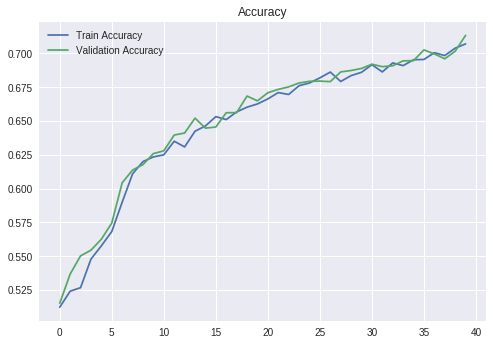

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'conv', 'conv', 'pool', 'conv', 'conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'affine', 'affine', 'affine', 'affine'], [[64, 3, 1], [64, 3, 1], [128, 3, 1], [128, 3, 1], [256, 3, 1], [256, 3, 1], [256, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1]], [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2]], [1024, 1024, 250, 2]]
Learning Rate: 0.005
Dropout: 0.5
Batch Norm: True
Epoch : 1 Loss : 0.693  Train Accuracy: 0.510 Validation Accuracy: 0.513
Epoch : 2 Loss : 0.692  Train Accuracy: 0.523 Validation Accuracy: 0.527
Epoch : 3 Loss : 0.691  Train Accuracy: 0.533 Validation Accuracy: 0.531
Epoch : 4 Loss : 0.691  Train Accuracy: 0.528 Validation Accuracy: 0.540
Epoch : 5 Loss : 0.690  Train Accuracy: 0.539 Validation Accuracy: 0.544
Epoch : 6 Loss : 0.689  Train Accuracy: 0.541 Validation Accuracy: 0.547
Epoch : 7 Loss : 0.687  Train Accuracy: 0.550 Validation Accuracy: 

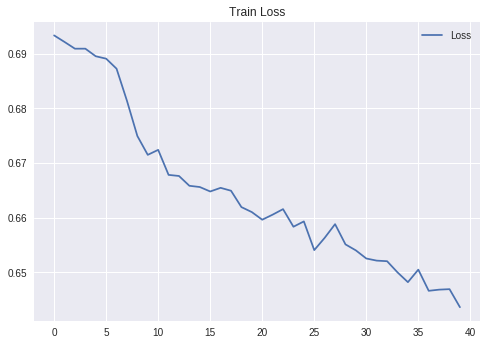

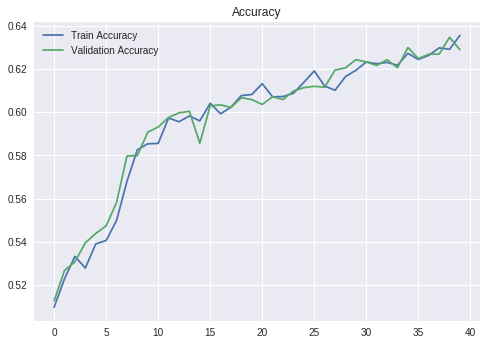

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'conv', 'conv', 'pool', 'conv', 'conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'affine', 'affine', 'affine', 'affine'], [[64, 3, 1], [64, 3, 1], [128, 3, 1], [128, 3, 1], [256, 3, 1], [256, 3, 1], [256, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1]], [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2]], [1024, 1024, 250, 2]]
Learning Rate: 0.001
Dropout: 0.25
Batch Norm: True
Epoch : 1 Loss : 0.690  Train Accuracy: 0.552 Validation Accuracy: 0.576
Epoch : 2 Loss : 0.677  Train Accuracy: 0.580 Validation Accuracy: 0.602
Epoch : 3 Loss : 0.667  Train Accuracy: 0.600 Validation Accuracy: 0.617
Epoch : 4 Loss : 0.657  Train Accuracy: 0.613 Validation Accuracy: 0.608
Epoch : 5 Loss : 0.649  Train Accuracy: 0.624 Validation Accuracy: 0.635
Epoch : 6 Loss : 0.644  Train Accuracy: 0.632 Validation Accuracy: 0.639
Epoch : 7 Loss : 0.636  Train Accuracy: 0.643 Validation Accuracy:

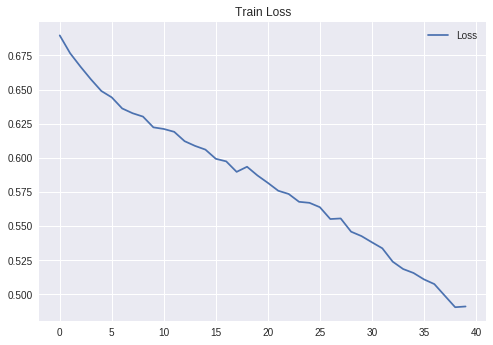

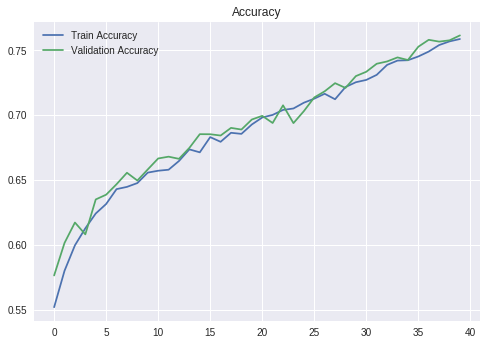

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'conv', 'conv', 'pool', 'conv', 'conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'affine', 'affine', 'affine', 'affine'], [[64, 3, 1], [64, 3, 1], [128, 3, 1], [128, 3, 1], [256, 3, 1], [256, 3, 1], [256, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1]], [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2]], [1024, 1024, 250, 2]]
Learning Rate: 0.001
Dropout: 0.5
Batch Norm: True
Epoch : 1 Loss : 0.691  Train Accuracy: 0.538 Validation Accuracy: 0.561
Epoch : 2 Loss : 0.681  Train Accuracy: 0.568 Validation Accuracy: 0.571
Epoch : 3 Loss : 0.679  Train Accuracy: 0.579 Validation Accuracy: 0.584
Epoch : 4 Loss : 0.673  Train Accuracy: 0.593 Validation Accuracy: 0.591
Epoch : 5 Loss : 0.670  Train Accuracy: 0.599 Validation Accuracy: 0.606
Epoch : 6 Loss : 0.666  Train Accuracy: 0.604 Validation Accuracy: 0.611
Epoch : 7 Loss : 0.662  Train Accuracy: 0.613 Validation Accuracy: 

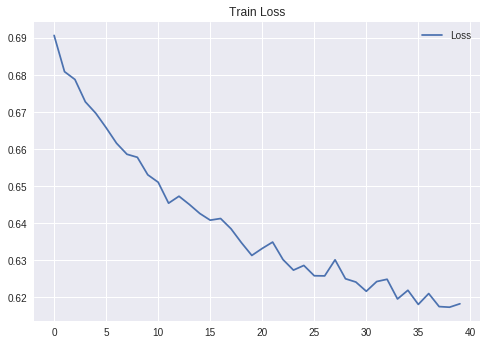

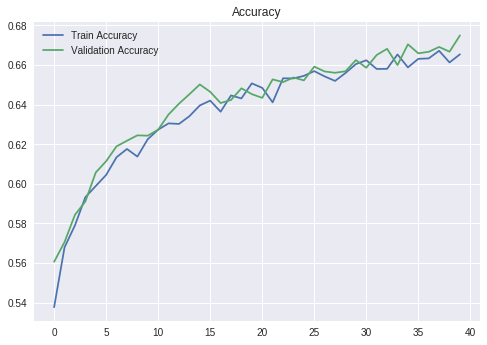

In [20]:

hyperparameters = {
    'arch': [[['conv','conv','pool','conv','conv','pool','conv','conv','conv','pool','conv','conv','conv','pool','conv','conv','pool','affine','affine','affine','affine'],
              [[64,3,1],[64,3,1],[128,3,1],[128,3,1],[256,3,1],[256,3,1],[256,3,1],[512,3,1],[512,3,1],[512,3,1],[512,3,1],[512,3,1],[512,3,1]],
              [[2,2],[2,2],[2,2],[2,2],[2,2]],[1024,1024,250,2]] # largest network  
            ],
    'lrs': [1e-2,5e-3,1e-3],
    'dropout': [0.25,0.5],
    'batch_norm': [True,False]   
}

loss_crit = nn.CrossEntropyLoss().cuda(device=0)

epochs=40
bestNet = None
curr_max_val = 0
best_prec1 = 0
cudnn.benchmark = True
for i,arch in enumerate(hyperparameters['arch']):
  for lr in hyperparameters['lrs']:
    for dropout in hyperparameters['dropout']:
      print('Hyper parameters:')
      print('Architecture: '+ repr(arch))
      print('Learning Rate: ' + repr(lr))
      print('Dropout: ' + repr(dropout))
      print('Batch Norm: ' + repr(bnorm))
      model = NeuralNet(arch[0],arch[1],arch[2],arch[3],loss_crit,dropout,batch_norm=True)

      model.myparameters = model.myparameters.cuda(device=0)
      optimizer = optimizer = torch.optim.Adam(model.myparameters,lr=lr)
      train_results = model.train_model(train_loader,optimizer, epochs, val_loader, verbose=True)
      (bestNetwork, epoch_loss, train_accuracy, val_accuracy, test_accuracy) = train_results
      if max(val_accuracy)> curr_max_val:
        bestNet = bestNetwork
        save_checkpoint({
          'epoch': epochs + 1,
          'arch': repr(i),
          'state_dict': bestNet.state_dict(),
          'best_prec1': max(val_accuracy),
        },max(val_accuracy)>=curr_max_val,i)
        curr_max_val = max(val_accuracy)
      plt.plot(epoch_loss, label='Loss')
      plt.legend()
      plt.title('Train Loss')
      plt.show()
      plt.plot(train_accuracy, label = 'Train Accuracy')
      plt.plot(val_accuracy, label='Validation Accuracy')
      plt.title('Accuracy')
      plt.legend()
      plt.show()

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'conv', 'conv', 'pool', 'conv', 'conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'affine', 'affine', 'affine', 'affine'], [[64, 3, 1], [64, 3, 1], [128, 3, 1], [128, 3, 1], [256, 3, 1], [256, 3, 1], [256, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1]], [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2]], [4096, 4096, 1000, 2]]
Learning Rate: 0.0005
Dropout: 0
Batch Norm: True
Epoch : 1 Loss : 0.646  Train Accuracy: 0.629 Validation Accuracy: 0.641
Epoch : 2 Loss : 0.612  Train Accuracy: 0.667 Validation Accuracy: 0.673
Epoch : 3 Loss : 0.594  Train Accuracy: 0.684 Validation Accuracy: 0.709
Epoch : 4 Loss : 0.566  Train Accuracy: 0.709 Validation Accuracy: 0.700
Epoch : 5 Loss : 0.543  Train Accuracy: 0.720 Validation Accuracy: 0.741
Epoch : 6 Loss : 0.514  Train Accuracy: 0.745 Validation Accuracy: 0.764
Epoch : 7 Loss : 0.485  Train Accuracy: 0.760 Validation Accuracy: 

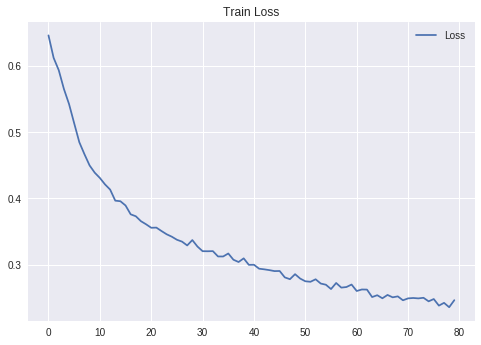

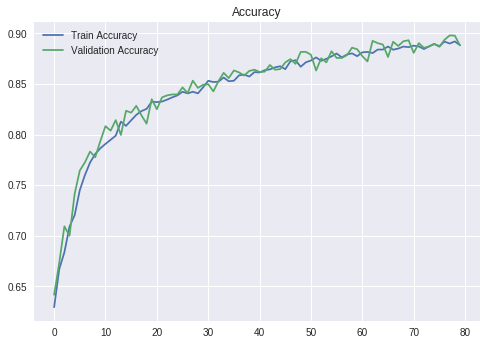

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'conv', 'conv', 'pool', 'conv', 'conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'affine', 'affine', 'affine', 'affine'], [[64, 3, 1], [64, 3, 1], [128, 3, 1], [128, 3, 1], [256, 3, 1], [256, 3, 1], [256, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1]], [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2]], [4096, 4096, 1000, 2]]
Learning Rate: 0.0005
Dropout: 0.2
Batch Norm: True
Epoch : 1 Loss : 0.683  Train Accuracy: 0.569 Validation Accuracy: 0.598
Epoch : 2 Loss : 0.660  Train Accuracy: 0.606 Validation Accuracy: 0.615
Epoch : 3 Loss : 0.651  Train Accuracy: 0.623 Validation Accuracy: 0.619
Epoch : 4 Loss : 0.642  Train Accuracy: 0.632 Validation Accuracy: 0.638
Epoch : 5 Loss : 0.637  Train Accuracy: 0.640 Validation Accuracy: 0.649
Epoch : 6 Loss : 0.628  Train Accuracy: 0.652 Validation Accuracy: 0.652
Epoch : 7 Loss : 0.625  Train Accuracy: 0.656 Validation Accuracy

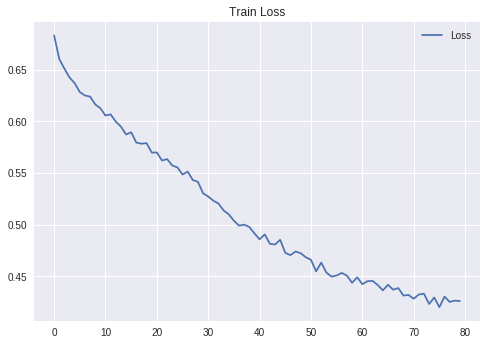

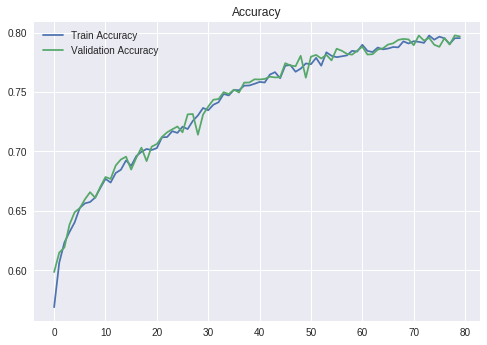

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'conv', 'conv', 'pool', 'conv', 'conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'affine', 'affine', 'affine', 'affine'], [[64, 3, 1], [64, 3, 1], [128, 3, 1], [128, 3, 1], [256, 3, 1], [256, 3, 1], [256, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1]], [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2]], [4096, 4096, 1000, 2]]
Learning Rate: 0.001
Dropout: 0
Batch Norm: True
Epoch : 1 Loss : 0.669  Train Accuracy: 0.597 Validation Accuracy: 0.642
Epoch : 2 Loss : 0.637  Train Accuracy: 0.638 Validation Accuracy: 0.638
Epoch : 3 Loss : 0.624  Train Accuracy: 0.655 Validation Accuracy: 0.670
Epoch : 4 Loss : 0.603  Train Accuracy: 0.680 Validation Accuracy: 0.681
Epoch : 5 Loss : 0.586  Train Accuracy: 0.691 Validation Accuracy: 0.710
Epoch : 6 Loss : 0.567  Train Accuracy: 0.708 Validation Accuracy: 0.709
Epoch : 7 Loss : 0.553  Train Accuracy: 0.714 Validation Accuracy: 0

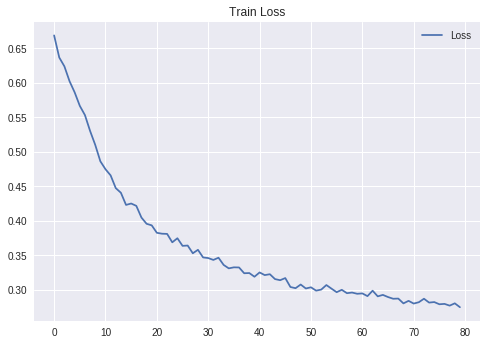

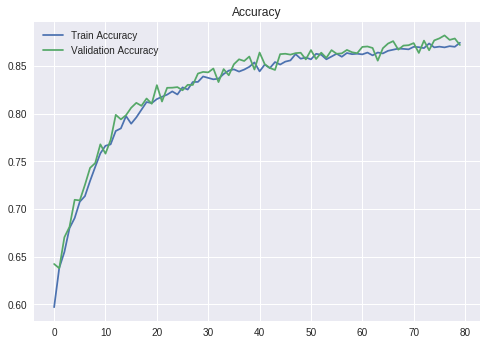

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'conv', 'conv', 'pool', 'conv', 'conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'affine', 'affine', 'affine', 'affine'], [[64, 3, 1], [64, 3, 1], [128, 3, 1], [128, 3, 1], [256, 3, 1], [256, 3, 1], [256, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1]], [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2]], [4096, 4096, 1000, 2]]
Learning Rate: 0.001
Dropout: 0.2
Batch Norm: True
Epoch : 1 Loss : 0.702  Train Accuracy: 0.523 Validation Accuracy: 0.554
Epoch : 2 Loss : 0.679  Train Accuracy: 0.575 Validation Accuracy: 0.584
Epoch : 3 Loss : 0.669  Train Accuracy: 0.596 Validation Accuracy: 0.609
Epoch : 4 Loss : 0.660  Train Accuracy: 0.613 Validation Accuracy: 0.615
Epoch : 5 Loss : 0.650  Train Accuracy: 0.620 Validation Accuracy: 0.619
Epoch : 6 Loss : 0.651  Train Accuracy: 0.623 Validation Accuracy: 0.626
Epoch : 7 Loss : 0.643  Train Accuracy: 0.632 Validation Accuracy:

In [0]:
hyperparameters = {
    'arch': [[['conv','conv','pool','conv','conv','pool','conv','conv','conv','pool','conv','conv','conv','pool','conv','conv','pool','affine','affine','affine','affine'],
              [[64,3,1],[64,3,1],[128,3,1],[128,3,1],[256,3,1],[256,3,1],[256,3,1],[512,3,1],[512,3,1],[512,3,1],[512,3,1],[512,3,1],[512,3,1]],
              [[2,2],[2,2],[2,2],[2,2],[2,2]],[4096,4096,1000,2]] # largest network  
            ],
    'lrs': [1e-4,2.5e-4,5e-4],
    'dropout': [0],
    'batch_norm': [True]   
}

loss_crit = nn.CrossEntropyLoss().cuda(device=0)

epochs=80
bestNet = None
curr_max_val = 0
best_prec1 = 0
cudnn.benchmark = True

bnorm=hyperparameters['batch_norm'][0]
for i,arch in enumerate(hyperparameters['arch']):
  for lr in hyperparameters['lrs']:
    for dropout in hyperparameters['dropout']:
      print('Hyper parameters:')
      print('Architecture: '+ repr(arch))
      print('Learning Rate: ' + repr(lr))
      print('Dropout: ' + repr(dropout))
      print('Batch Norm: ' + repr(bnorm))
      model = NeuralNet(arch[0],arch[1],arch[2],arch[3],loss_crit,dropout,batch_norm=True)

      model.myparameters = model.myparameters.cuda(device=0)
      optimizer = optimizer = torch.optim.Adam(model.myparameters, lr=lr, weight_decay=0.0002)
      train_results = model.train_model(train_loader,optimizer, epochs, val_loader, verbose=True)
      (bestNetwork, epoch_loss, train_accuracy, val_accuracy, test_accuracy) = train_results
      if max(val_accuracy)> curr_max_val:
        bestNet = bestNetwork
        save_checkpoint({
          'epoch': epochs + 1,
          'arch': repr(i),
          'state_dict': bestNet.state_dict(),
          'best_prec1': max(val_accuracy),
        },max(val_accuracy)>=curr_max_val,i)
        curr_max_val = max(val_accuracy)
      plt.plot(epoch_loss, label='Loss')
      plt.legend()
      plt.title('Train Loss')
      plt.show()
      plt.plot(train_accuracy, label = 'Train Accuracy')
      plt.plot(val_accuracy, label='Validation Accuracy')
      plt.title('Accuracy')
      plt.legend()
      plt.show()

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'conv', 'conv', 'pool', 'conv', 'conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'affine', 'affine', 'affine', 'affine'], [[64, 3, 1], [64, 3, 1], [128, 3, 1], [128, 3, 1], [256, 3, 1], [256, 3, 1], [256, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1]], [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2]], [4096, 4096, 1000, 2]]
Learning Rate: 0.0001
Dropout: 0
Batch Norm: True
Epoch : 1 Loss : 0.646  Train Accuracy: 0.642 Validation Accuracy: 0.680
Epoch : 2 Loss : 0.613  Train Accuracy: 0.688 Validation Accuracy: 0.726
Epoch : 3 Loss : 0.580  Train Accuracy: 0.726 Validation Accuracy: 0.747
Epoch : 4 Loss : 0.550  Train Accuracy: 0.746 Validation Accuracy: 0.750
Epoch : 5 Loss : 0.524  Train Accuracy: 0.768 Validation Accuracy: 0.757
Epoch : 6 Loss : 0.507  Train Accuracy: 0.774 Validation Accuracy: 0.778
Epoch : 7 Loss : 0.484  Train Accuracy: 0.792 Validation Accuracy: 

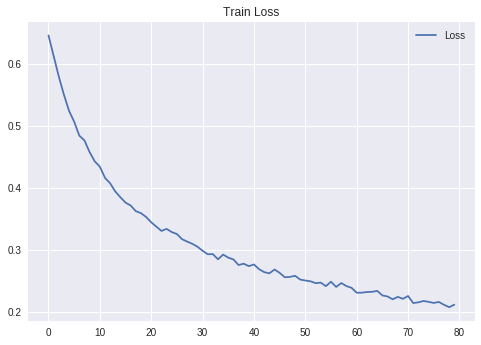

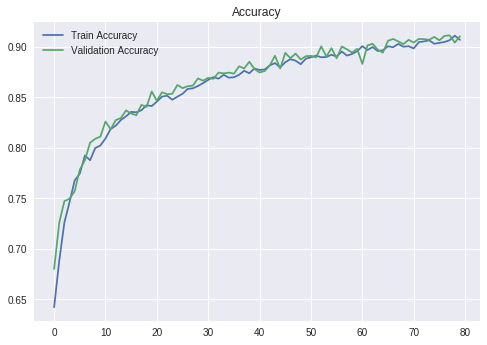

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'conv', 'conv', 'pool', 'conv', 'conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'affine', 'affine', 'affine', 'affine'], [[64, 3, 1], [64, 3, 1], [128, 3, 1], [128, 3, 1], [256, 3, 1], [256, 3, 1], [256, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1]], [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2]], [4096, 4096, 1000, 2]]
Learning Rate: 0.00025
Dropout: 0
Batch Norm: True
Epoch : 1 Loss : 0.651  Train Accuracy: 0.621 Validation Accuracy: 0.661
Epoch : 2 Loss : 0.591  Train Accuracy: 0.681 Validation Accuracy: 0.719
Epoch : 3 Loss : 0.544  Train Accuracy: 0.721 Validation Accuracy: 0.745
Epoch : 4 Loss : 0.514  Train Accuracy: 0.740 Validation Accuracy: 0.747
Epoch : 5 Loss : 0.485  Train Accuracy: 0.758 Validation Accuracy: 0.778
Epoch : 6 Loss : 0.467  Train Accuracy: 0.769 Validation Accuracy: 0.790
Epoch : 7 Loss : 0.450  Train Accuracy: 0.777 Validation Accuracy:

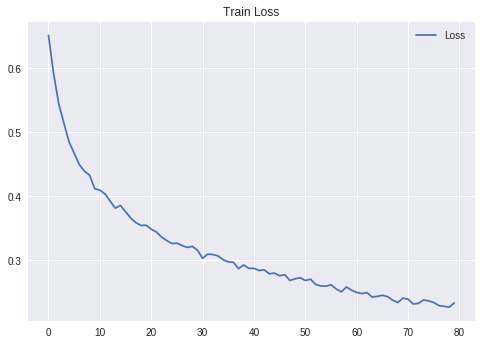

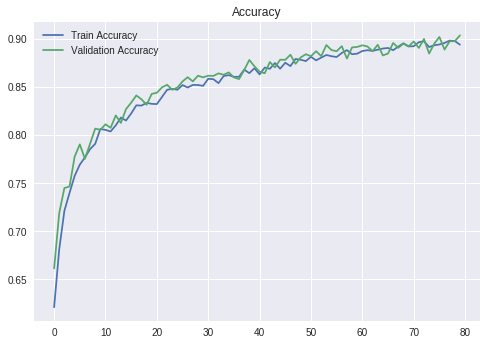

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'conv', 'conv', 'pool', 'conv', 'conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'affine', 'affine', 'affine', 'affine'], [[64, 3, 1], [64, 3, 1], [128, 3, 1], [128, 3, 1], [256, 3, 1], [256, 3, 1], [256, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1]], [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2]], [4096, 4096, 1000, 2]]
Learning Rate: 0.0005
Dropout: 0
Batch Norm: True
Epoch : 1 Loss : 0.656  Train Accuracy: 0.616 Validation Accuracy: 0.642
Epoch : 2 Loss : 0.645  Train Accuracy: 0.631 Validation Accuracy: 0.645
Epoch : 3 Loss : 0.615  Train Accuracy: 0.667 Validation Accuracy: 0.677
Epoch : 4 Loss : 0.597  Train Accuracy: 0.679 Validation Accuracy: 0.688
Epoch : 5 Loss : 0.576  Train Accuracy: 0.703 Validation Accuracy: 0.706
Epoch : 6 Loss : 0.561  Train Accuracy: 0.710 Validation Accuracy: 0.724
Epoch : 7 Loss : 0.537  Train Accuracy: 0.728 Validation Accuracy: 

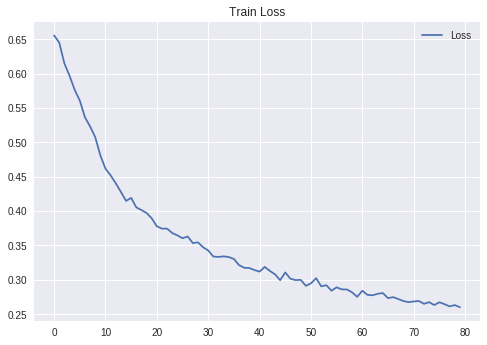

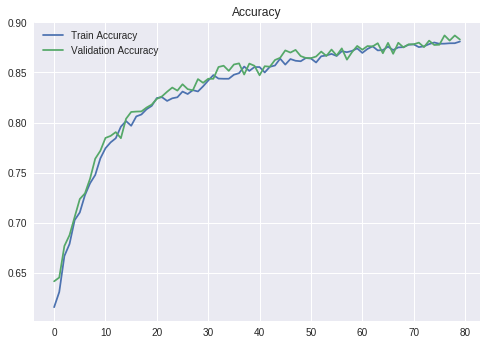

In [17]:
hyperparameters = {
    'arch': [[['conv','conv','pool','conv','conv','pool','conv','conv','conv','pool','conv','conv','conv','pool','conv','conv','pool','affine','affine','affine','affine'],
              [[64,3,1],[64,3,1],[128,3,1],[128,3,1],[256,3,1],[256,3,1],[256,3,1],[512,3,1],[512,3,1],[512,3,1],[512,3,1],[512,3,1],[512,3,1]],
              [[2,2],[2,2],[2,2],[2,2],[2,2]],[4096,4096,1000,2]] # largest network  
            ],
    'lrs': [1e-4,2.5e-4,5e-4],
    'dropout': [0],
    'batch_norm': [True]   
}

loss_crit = nn.CrossEntropyLoss().cuda(device=0)

epochs=80
bestNet = None
curr_max_val = 0
best_prec1 = 0
cudnn.benchmark = True

bnorm=hyperparameters['batch_norm'][0]
for i,arch in enumerate(hyperparameters['arch']):
  for lr in hyperparameters['lrs']:
    for dropout in hyperparameters['dropout']:
      print('Hyper parameters:')
      print('Architecture: '+ repr(arch))
      print('Learning Rate: ' + repr(lr))
      print('Dropout: ' + repr(dropout))
      print('Batch Norm: ' + repr(bnorm))
      model = NeuralNet(arch[0],arch[1],arch[2],arch[3],loss_crit,dropout,batch_norm=True)

      model.myparameters = model.myparameters.cuda(device=0)
      optimizer = optimizer = torch.optim.Adam(model.myparameters, lr=lr, weight_decay=0.0002)
      train_results = model.train_model(train_loader,optimizer, epochs, val_loader, verbose=True)
      (bestNetwork, epoch_loss, train_accuracy, val_accuracy, test_accuracy) = train_results
      if max(val_accuracy)> curr_max_val:
        bestNet = bestNetwork
        save_checkpoint({
          'epoch': epochs + 1,
          'arch': repr(i),
          'state_dict': bestNet.state_dict(),
          'best_prec1': max(val_accuracy),
        },max(val_accuracy)>=curr_max_val,i)
        curr_max_val = max(val_accuracy)
      plt.plot(epoch_loss, label='Loss')
      plt.legend()
      plt.title('Train Loss')
      plt.show()
      plt.plot(train_accuracy, label = 'Train Accuracy')
      plt.plot(val_accuracy, label='Validation Accuracy')
      plt.title('Accuracy')
      plt.legend()
      plt.show()

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'conv', 'conv', 'pool', 'conv', 'conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'affine', 'affine', 'affine', 'affine'], [[64, 3, 1], [64, 3, 1], [128, 3, 1], [128, 3, 1], [256, 3, 1], [256, 3, 1], [256, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1]], [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2]], [4096, 4096, 1000, 2]]
Learning Rate: 5e-05
Dropout: 0
Batch Norm: True
Epoch : 1 Loss : 0.638  Train Accuracy: 0.631 Validation Accuracy: 0.688
Epoch : 2 Loss : 0.591  Train Accuracy: 0.684 Validation Accuracy: 0.703
Epoch : 3 Loss : 0.551  Train Accuracy: 0.718 Validation Accuracy: 0.730
Epoch : 4 Loss : 0.522  Train Accuracy: 0.738 Validation Accuracy: 0.748
Epoch : 5 Loss : 0.507  Train Accuracy: 0.749 Validation Accuracy: 0.765
Epoch : 6 Loss : 0.491  Train Accuracy: 0.763 Validation Accuracy: 0.762
Epoch : 7 Loss : 0.480  Train Accuracy: 0.766 Validation Accuracy: 0

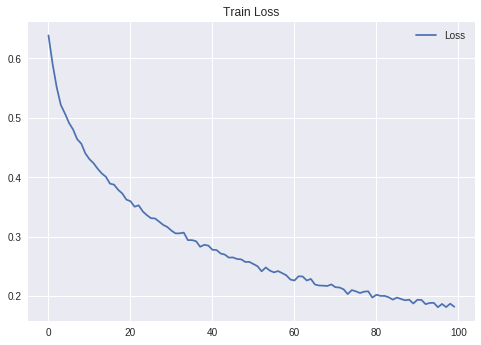

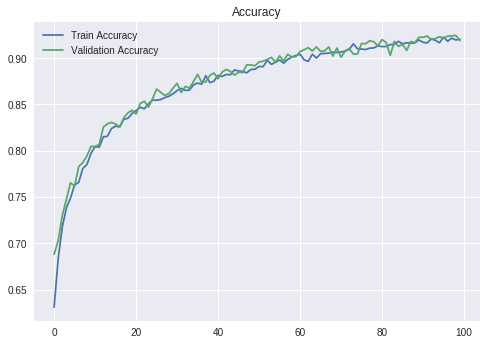

Hyper parameters:
Architecture: [['conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'conv', 'conv', 'conv', 'pool', 'conv', 'conv', 'conv', 'pool', 'conv', 'conv', 'pool', 'affine', 'affine', 'affine', 'affine'], [[64, 3, 1], [64, 3, 1], [128, 3, 1], [128, 3, 1], [256, 3, 1], [256, 3, 1], [256, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1], [512, 3, 1]], [[2, 2], [2, 2], [2, 2], [2, 2], [2, 2]], [4096, 4096, 1000, 2]]
Learning Rate: 1e-05
Dropout: 0
Batch Norm: True
Epoch : 1 Loss : 0.665  Train Accuracy: 0.601 Validation Accuracy: 0.629
Epoch : 2 Loss : 0.637  Train Accuracy: 0.644 Validation Accuracy: 0.659
Epoch : 3 Loss : 0.622  Train Accuracy: 0.665 Validation Accuracy: 0.682
Epoch : 4 Loss : 0.610  Train Accuracy: 0.684 Validation Accuracy: 0.697
Epoch : 5 Loss : 0.600  Train Accuracy: 0.700 Validation Accuracy: 0.703
Epoch : 6 Loss : 0.593  Train Accuracy: 0.711 Validation Accuracy: 0.719
Epoch : 7 Loss : 0.588  Train Accuracy: 0.714 Validation Accuracy: 0

In [0]:
hyperparameters = {
    'arch': [[['conv','conv','pool','conv','conv','pool','conv','conv','conv','pool','conv','conv','conv','pool','conv','conv','pool','affine','affine','affine','affine'],
              [[64,3,1],[64,3,1],[128,3,1],[128,3,1],[256,3,1],[256,3,1],[256,3,1],[512,3,1],[512,3,1],[512,3,1],[512,3,1],[512,3,1],[512,3,1]],
              [[2,2],[2,2],[2,2],[2,2],[2,2]],[4096,4096,1000,2]] # largest network  
            ],
    'lrs': [5e-5],
    'dropout': [0],
    'batch_norm': [True]   
}

loss_crit = nn.CrossEntropyLoss().cuda(device=0)

epochs=150
bestNet = None
curr_max_val = 0
best_prec1 = 0
cudnn.benchmark = True

bnorm=hyperparameters['batch_norm'][0]
for i,arch in enumerate(hyperparameters['arch']):
  for lr in hyperparameters['lrs']:
    for dropout in hyperparameters['dropout']:
      print('Hyper parameters:')
      print('Architecture: '+ repr(arch))
      print('Learning Rate: ' + repr(lr))
      print('Dropout: ' + repr(dropout))
      print('Batch Norm: ' + repr(bnorm))
      model = NeuralNet(arch[0],arch[1],arch[2],arch[3],loss_crit,dropout,batch_norm=True)

      model.myparameters = model.myparameters.cuda(device=0)
      optimizer = optimizer = torch.optim.Adam(model.myparameters, lr=lr, weight_decay=0.0001)
      train_results = model.train_model(train_loader,optimizer, epochs, val_loader, verbose=True)
      (bestNetwork, epoch_loss, train_accuracy, val_accuracy, test_accuracy) = train_results
      if max(val_accuracy)> curr_max_val:
        bestNet = bestNetwork
        save_checkpoint({
          'epoch': epochs + 1,
          'arch': repr(i),
          'state_dict': bestNet.state_dict(),
          'best_prec1': max(val_accuracy),
        },max(val_accuracy)>=curr_max_val,i)
        curr_max_val = max(val_accuracy)
      plt.plot(epoch_loss, label='Loss')
      plt.legend()
      plt.title('Train Loss')
      plt.show()
      plt.plot(train_accuracy, label = 'Train Accuracy')
      plt.plot(val_accuracy, label='Validation Accuracy')
      plt.title('Accuracy')
      plt.legend()
      plt.show()

The best network had the following architecture:

### Kernel died retraining best network for test eval and visualizations

In order to improve the network further it seems the best option would be to further increase the size of the network. Since we're using zero dropout, and still not overfitting, we are currently underfitting the model. 